
# IDS Assignment Part 1

This is the first part of the assignment in IDS 2023/2024.

Please use this Jupyter notebook to work on the questions posed in the assignment. When you are done, upload the notebook in Moodle at the designated activity. This is the _only_ file that is required. A separate report is _not_ needed and will not be considered for grading.
Provide your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. **Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting!** Additionally, please ensure that the code notebook runs if placed in the same folder as all of the provided files, delivering the same outputs as the ones you submit in the notebook. This includes being runnable in the bundled conda environment.

*Please make sure to include the names and matriculation numbers of all group members in the slot provided below.* If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification, data simplification, or output interpretation. **Ensure that all your claims are supported.**

Hint 2: **Plan your time wisely.** A few parts of this assignment may take some time to run. It might be necessary to consider time management when you plan your group work. Also, do not attempt to upload your assignment at the last minute before the deadline. This often does not work, and you will miss the deadline. Late submissions will not be considered.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. **Partial submissions are possible and encouraged.** This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.

**Student names and matriculation numbers**

1.)

2.)

3.)

# Table of Contents

**Re-Drive - A platform for selling your used car**

**Q1: Preprocessing the data set**

**Q2: Exploring the data set**
- **(a) Exploration of the target feature**
- **(b) Exploration of correlations**
    - (i) Correleation with numerical attributes
    - (ii) Univariate correlations with categorical attributes
    - (iii) Multivariate correlations with categorical attributes

**Q3: Predicting prices**
- **(a) Baseline**
- **(b) Prediction by classification**
    - (i) Price binning
    - (ii) Data transformation for decision trees
    - (iii) Model training
    - (iv) Price prediction
- **(c) Prediction by clustering**
    - (i) Data transformation for clustering
    - (ii) Computing the distance matrix
    - (iii) Applying DBSCAN
    - (iv) Price prediction
- **(d) Prediction by regression and with neural networks**
    - (i) Feature engineering
    - (ii) Feature selection
    - (iii) Data transformation for regression and neural networks
    - (iv) Model training function
    - (v) Linear regression
    - (vi) Regression with non-linear kernels
    - (vii) Neural networks
- **(e) Discussion**


**Q4: Predicting time-to-sale**
- **(a) Data preparation**
    - (i) Target feature creation
    - (ii) Sensitivity and specificity
    - (iii) Data transformation for classification problem
- **(b) Classifiers**
    - (i) Model training
    - (ii) Evaluation Part 1
    - (iii) Evaluation Part 2
- **(c) Discussion**


# ReDrive - A platform for selling your used car

You finally made it! After years of hard study, you finally obtained a degree in data science. Congratulations!

Having a passion for automotive technologies, you decided to combine that passion with your profound knowledge in data science. Together with your colleague N., who has a passion for sustainability, you founded **ReDrive** in the beginning of 2023, an online platform where people can sell their used cars.

The first months of your joint venture are going very well, and you are making good revenue. It is time now for you to apply your data science expertise to evaluate your business and to look for improvement potential. Your idea on that is to first explore the data, and then to see if you can create useful models for predicting car prices.

The dataset *used_cars.csv* contains information about cars that customers have sold or are trying to sell via ReDrive in 2023.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Q1: Preprocessing the data set **[8 points]**

Using the file *used_cars.csv*, create a dataframe. **[1 point]**

In [2]:
# Your code here
used_cars = pd.read_csv('used_cars.csv')
used_cars

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


Provide the names of all columns that contain NaN values. **[1 point]**

In [3]:
# Your code here
used_cars.columns[used_cars.isnull().any()]

Index(['fuel_type', 'accident', 'clean_title'], dtype='object')

**Answer:** 

*'fuel_type', 'accident', 'clean_title' this 3 columns contain NaN values*

Display all rows containing NaN values. **[1 point]**

In [4]:
# Your code here
used_cars[used_cars.isna().any(axis = 1)]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
5,Acura,ILX 2.4L,2016,"136,397 mi.",Gasoline,2.4 Liter,F,Silver,Ebony.,None reported,NaN,"$14,798"
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",NaN,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"
10,Land,Rover Range Rover Sport 3.0 Supercharged HST,2021,"27,608 mi.",Gasoline,V6,Automatic,Fuji White,Pimento / Ebony,None reported,NaN,"$73,897"
...,...,...,...,...,...,...,...,...,...,...,...,...
3962,Toyota,4Runner TRD Pro,2021,"35,048 mi.",Gasoline,4.0L V6 24V MPFI DOHC,5-Speed Automatic,Lunar Rock,Black / Graphite,None reported,NaN,"$52,590"
3991,Porsche,Cayenne Turbo,2020,"39,611 mi.",Gasoline,4.0L V8 32V GDI DOHC Twin Turbo,8-Speed Automatic,Quartzite Grey Metallic,Black,None reported,NaN,"$89,900"
3993,Porsche,911 Carrera S,2021,"7,008 mi.",Gasoline,443.0HP 3.0L Flat 6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Gray,Black,NaN,NaN,"$151,900"
3996,Aston,Martin DB7 Vantage Volante,2003,"14,900 mi.",Gasoline,420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel,6-Speed M/T,White,Beige,NaN,NaN,"$32,850"


You investigate the NaN values further. You decide to map the NaN values from the clean_title column to "No". Also, you map the NaN values of the accident column to "Unknown". **[1 point]**

In [5]:
# Your code here
used_cars['clean_title'] = used_cars['clean_title'].fillna('No')
used_cars['accident'] = used_cars['accident'].fillna('Unknown')
used_cars.columns[used_cars.isnull().any()]

Index(['fuel_type'], dtype='object')

Finally, you investigate the NaN values of the fuel_type column. To do so, you inspect the unique values of that column. What is your observation? Which general type of engine is accociated with NaN values in the fuel_type column? **[1 point]**

In [6]:
#Your code here
Nan_fuel = used_cars[used_cars.isna().any(axis = 1)]
unique_engine = Nan_fuel['engine'].unique()
unique_engine

array(['534.0HP Electric Motor Electric Fuel System',
       '536.0HP Electric Motor Electric Fuel System',
       '835.0HP Electric Motor Electric Fuel System',
       '620.0HP Electric Motor Electric Fuel System',
       '455.0HP Electric Motor Electric Fuel System',
       '670.0HP Electric Motor Electric Fuel System', 'Electric',
       '355.0HP Electric Motor Electric Fuel System',
       '329.0HP Electric Motor Electric Fuel System',
       '271.0HP Electric Motor Electric Fuel System',
       'Standard Range Battery', '111.2Ah / FR 70kW / RR 160kW (697V)',
       '200.0HP Electric Motor Electric Fuel System',
       '425.0HP Electric Motor Electric Fuel System',
       '147.0HP Electric Motor Electric Fuel System',
       '107.0HP Electric Motor Electric Fuel System',
       'Dual Motor - Standard',
       '403.0HP 2.0L Electric Motor Electric Fuel System',
       '290.0HP Electric Motor Electric Fuel System',
       '266.0HP Electric Motor Electric Fuel System',
       '346.0HP

**Answer:** 

*All engines are involved of electric engine.*

Based on your former findings, you decide to map the NaN values of the column fuel_type to a value. Choose a suitable value. **[1 point]**

In [7]:
# Your code here
used_cars['fuel_type'] = used_cars['fuel_type'].fillna('Electric')
used_cars.loc[used_cars['fuel_type'] == 'Electric']


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
9,Tesla,Model X Long Range Plus,2020,"34,000 mi.",Electric,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,Yes,"$69,950"
44,Lucid,Air Grand Touring,2022,"3,552 mi.",Electric,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Beige,None reported,Yes,"$119,999"
68,Lucid,Air Grand Touring,2022,"4,900 mi.",Electric,536.0HP Electric Motor Electric Fuel System,1-Speed A/T,Red,Black,None reported,Yes,"$99,000"
92,Rivian,R1S Adventure Package,2023,"2,800 mi.",Electric,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,White,Green,None reported,Yes,"$92,000"
122,Rivian,R1S Adventure Package,2023,"2,500 mi.",Electric,835.0HP Electric Motor Electric Fuel System,A/T,Green,White,None reported,Yes,"$94,000"
...,...,...,...,...,...,...,...,...,...,...,...,...
3908,Tesla,Model Y Long Range,2021,"49,252 mi.",Electric,Electric,1-Speed Automatic,Deep Blue Metallic,Black,None reported,No,"$37,999"
3913,Tesla,Model S 100D,2018,"65,000 mi.",Electric,518.0HP Electric Motor Electric Fuel System,A/T,Blue,Black,None reported,Yes,"$41,000"
3932,Tesla,Model X Performance,2020,"25,535 mi.",Electric,778.0HP Electric Motor Electric Fuel System,A/T,White,Beige,None reported,Yes,"$68,969"
3961,Tesla,Model 3 Long Range,2021,"23,749 mi.",Electric,Electric,1-Speed Automatic,White,Black,None reported,No,"$35,999"


You investigate the other values of the fuel_type column. You decide to remove entries that either have *'–'* or *'not supported'* as values. **[1 point]**

In [8]:
# Your code here
used_cars = used_cars[~used_cars['fuel_type'].isin(['-', 'not supported'])]
used_cars

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",Electric,Electric,Automatic,Black,Black,None reported,No,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


How many rows does your final dataframe have? Are there any NaN values left in the columns? **[1 point]**

In [9]:
# Your code here
used_cars.columns[used_cars.isnull().any()]

Index([], dtype='object')

**Answer:** 

*There are no columns containing NaN now and currently have 4007 rows.*

# Q2: Exploring the dataset **[14 points]**

From now on, use the dataset `used_cars_preprocessed.csv`.

In [10]:
df = pd.read_csv("used_cars_preprocessed.csv")

In the following, you want to explore the dataset. 

## (a) Exploration of the target feature **[4 points]**

You are interested in automatically determining the price of a sold car. To do so, you apply your data science knowledge on predictions. You first create a boxplot concerning the price to get an initial impression of the distribution of this attribute. The boxplot should also show the mean. Are there outliers? What can you say about the spread prices? In addition, provide the average price, first and third quartile, and the standard deviation. 

**[3 points]**

   label  lower_whisker  first quartile   median         means  \
0  price         2000.0         16000.0  28900.0  35113.582271   

   third quartile  upper_whisker  
0         44998.5        87500.0  
average price = 35113.58227131124
standard deviation = 27683.727120951815


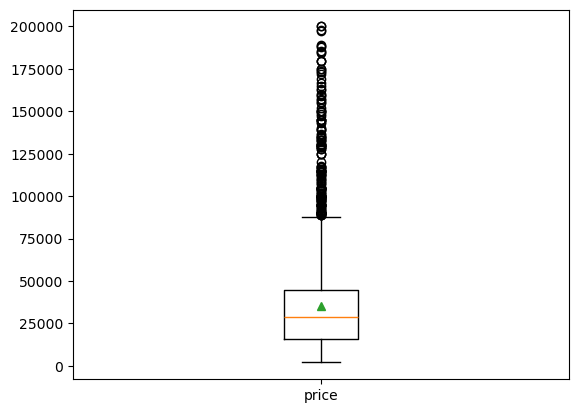

In [11]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['first quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['means'] = bp['means'][i].get_ydata()[0]
        dict1['third quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

car_price = df['price']

labels = ['price']
bp = plt.boxplot(car_price, labels=labels, showmeans = True)
print(get_box_plot_data(labels, bp))
print('average price =', car_price.mean())
print('standard deviation =', car_price.std())
plt.show()

**Answer:** 

*There are many outliers over upper whiskers, and from the boxes, since box plots are distributed in a lower area, we can find most cars are round to 16000 to 87500 area. But we can find there are some fancy cars with a high price which leads to the average price being higher than the median value from the median value number and upper outliers there are some cars' price is pretty large and affect the mean price.*

To get deeper insight into the price distribution, you decide to create a histogram. Choose an appropriate number of bins to get an informative plot. What do you observe? 

**[1 point]**

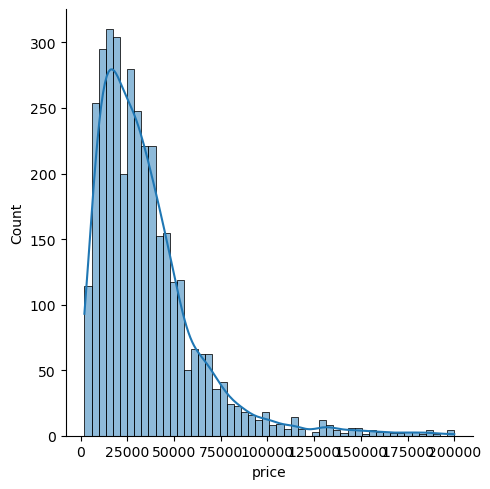

In [12]:
# Your code here
sns.displot(df, x='price', kde=True); 

**Answer:** 

*This proves my opinion, most cars' prices are located around median and mean value, and some fancy cars' prices affect the mean price.*

## (b) Exploration of correlations **[10 points]**

Next, you want to investigate possible correlations of other variables with the target feature.

### (i) Correleation with numerical attributes

To do so, you create a correlation matrix of the numeric values of dataset. Intepret the correlation values you found between price and *model_year*, *milage*, *horsepower*, *litres*, and *cylinders*. 

**[3 points]**

In [13]:
# Your code here
price_corr = pd.get_dummies(df)
correlation_matrix = price_corr.corr()
correlation_matrix.loc[['price'], ['model_year', 'milage', 'horsepower', 'litres', 'cylinders']]

,model_year,milage,horsepower,litres,cylinders
price,0.486867,-0.558964,0.545003,0.240132,0.308251


In [14]:
correlation_matrix

,model_year,milage,price,horsepower,litres,cylinders,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,...,int_col_Black,int_col_Brown,int_col_Gray,int_col_Red,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,accident_Unknown,clean_title_No,clean_title_Yes
model_year,1.000000,-0.586696,0.486867,0.244959,-0.122781,-0.130185,-0.019523,0.050925,-0.014402,0.048349,...,0.135308,0.075234,-0.145117,0.062955,0.044354,-0.166241,0.163453,-0.005742,0.273873,-0.273873
milage,-0.586696,1.000000,-0.558964,-0.281965,0.087578,0.032671,0.036745,-0.055994,-0.044895,-0.038509,...,-0.129597,-0.050129,0.130618,-0.100342,-0.011054,0.269770,-0.243925,-0.049797,-0.249599,0.249599
price,0.486867,-0.558964,1.000000,0.545003,0.240132,0.308251,-0.051887,0.004627,0.102420,0.026738,...,0.086195,0.066632,-0.132183,0.096016,0.024849,-0.215989,0.196618,0.036206,0.177751,-0.177751
horsepower,0.244959,-0.281965,0.545003,1.000000,0.537658,0.611432,-0.062472,0.023447,0.054537,-0.012616,...,0.063994,0.060000,-0.114397,0.078577,0.004037,-0.094699,0.085342,0.018268,0.038564,-0.038564
litres,-0.122781,0.087578,0.240132,0.537658,1.000000,0.848685,-0.065873,-0.072079,0.032573,-0.133806,...,-0.034617,-0.002922,0.044825,0.014249,-0.030987,0.011675,-0.015209,0.010745,-0.068513,0.068513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
accident_At least 1 accident or damage reported,-0.166241,0.269770,-0.215989,-0.094699,0.011675,-0.014599,0.013893,-0.033173,-0.002225,0.003392,...,-0.044857,0.002105,0.064401,-0.025369,-0.016749,1.000000,-0.933446,-0.103487,-0.170215,0.170215
accident_None reported,0.163453,-0.243925,0.196618,0.085342,-0.015209,0.008760,-0.011014,0.009647,-0.007935,-0.005635,...,0.045896,-0.001971,-0.059029,0.021242,0.011495,-0.933446,1.000000,-0.260191,0.011365,-0.011365
accident_Unknown,-0.005742,-0.049797,0.036206,0.018268,0.010745,0.015008,-0.006857,0.062540,0.027990,0.006493,...,-0.006517,-0.000201,-0.009674,0.009385,0.013211,-0.103487,-0.260191,1.000000,0.426656,-0.426656
clean_title_No,0.273873,-0.249599,0.177751,0.038564,-0.068513,-0.031384,0.038976,0.031846,-0.001635,0.025331,...,-0.015175,0.012375,-0.059484,0.078382,0.089143,-0.170215,0.011365,0.426656,1.000000,-1.000000


**Answer:**

*Horsepower has the highest positive correlation between model_year, liters, and cylinders, which means those variables with the better higher value will lead to a higher price, and in this variable horsepower has the highest positive effect. Otherwise, milage has a negative effect on price which is even higher than horsepower. Because milage and horsepower have the highest effect on the price, we can assume that the seller considers milage and horsepower as the most important reference.*


### (ii) Univariate correlations with categorical attributes

In the following, you consider the categorical attributes. You start with *brand*, *fuel_type*, *accident*, and *clean_title*. Create boxplots for these features to capture the relationship with *price*, also showing the mean. What do you observe? Are there feature values for which you can clearly identify a relationship to the price attribute? Also, comment on the outliers and potential distribution inside a value's prices. Be brief in your answers. 

**[2.5 points]**

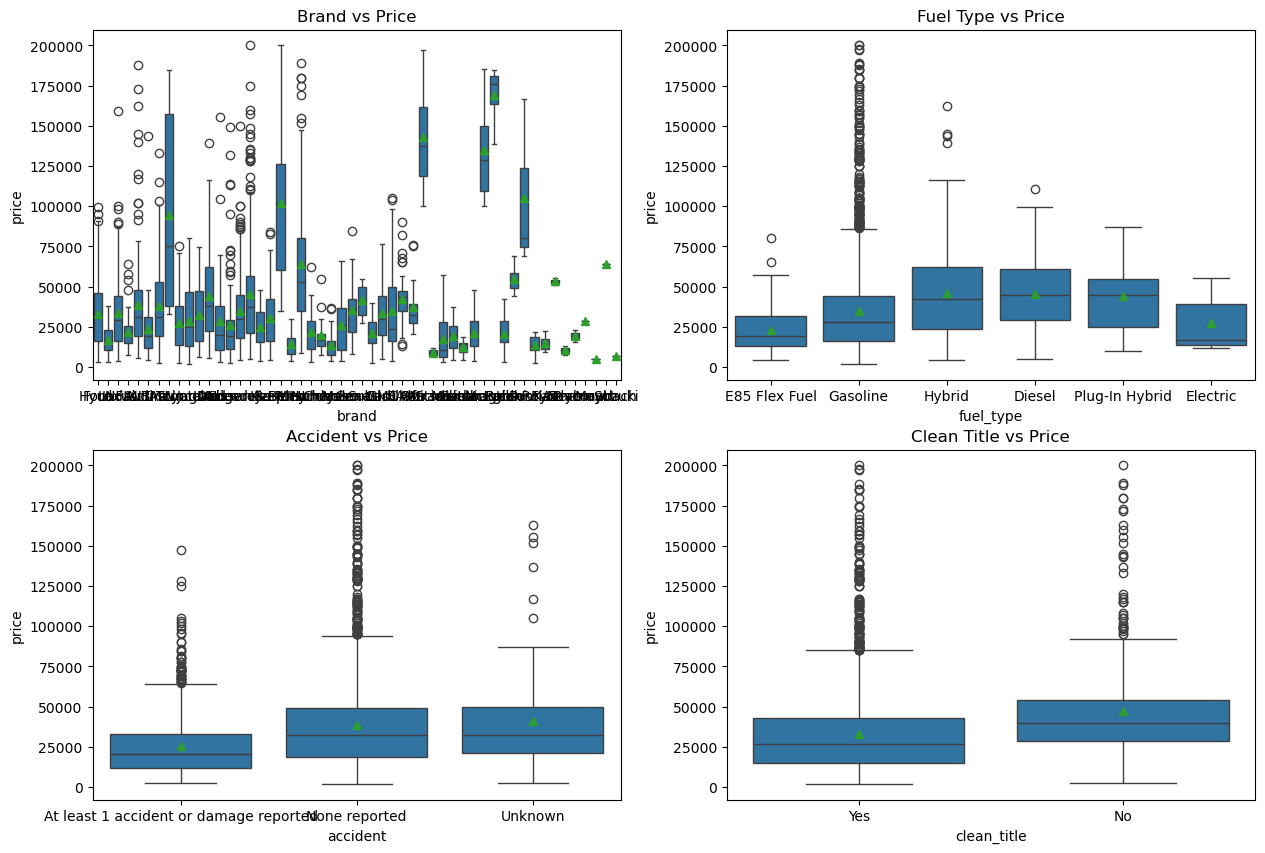

In [15]:
# Your code here
plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
sns.boxplot(x='brand', y='price', data=df, showmeans=True)
plt.title('Brand vs Price')


plt.subplot(2, 2, 2)
sns.boxplot(x='fuel_type', y='price', data=df, showmeans=True)
plt.title('Fuel Type vs Price')


plt.subplot(2, 2, 3)
sns.boxplot(x='accident', y='price', data=df, showmeans=True)
plt.title('Accident vs Price')


plt.subplot(2, 2, 4)
sns.boxplot(x='clean_title', y='price', data=df, showmeans=True)
plt.title('Clean Title vs Price')


plt.show()

**Answer:**
Brand vs Price: 
- The range of prices varies greatly across different brands, indicating that the brand can significantly affect a car's price.
- There are numerous outliers across many brands, suggesting that within each brand, there are vehicles that are priced much higher than the average.
- The distribution #within each brand varies, with some brands showing a wider range of prices, indicating more variety within the brand.

Fuel Type vs Price:

- Hybrid, Diesel and Plug-in Hybrid vehicles appear to have a higher median price compared to other fuel types, which could indicate these types of vehicles are generally more expensive.
- Electric vehicles show a lower spread of prices and fewer outliers, suggesting less variance in these vehicle prices.
- Gasoline vehicles have a large number of outliers, which could indicate that there are both low-end and high-end gasoline vehicles.

Accident vs Price:

- Vehicles with at least one accident or damage reported have a lower median price, which is expected as accidents can devalue a vehicle.
- None reported have a large number of outliers, which could indicate there are other attributes that affect cars without accident.
- The 'Unknown' category has a similar distribution to the 'None reported' category, indicating that the impact of unknown accident history on price might be minimal.

Clean Title vs Price:

- Cars with a clean title have a lower median price than those without, but there exists more outlier than those without we can assume seller with clean title is higher than those without.n.mal.les.and.
*

### (iii) Multivariate correlations with categorical attributes

As the current analysis provides limited insight, you want to include a multivariate view using boxplots that also show the mean. Again, you decide on *brand*, *fuel_type*, *accident*, and *clean_title* as features. You create a boxplot for each pair of features. Based on these, provide a conclusion. Each of the following cells focuses on one feature in particular. 

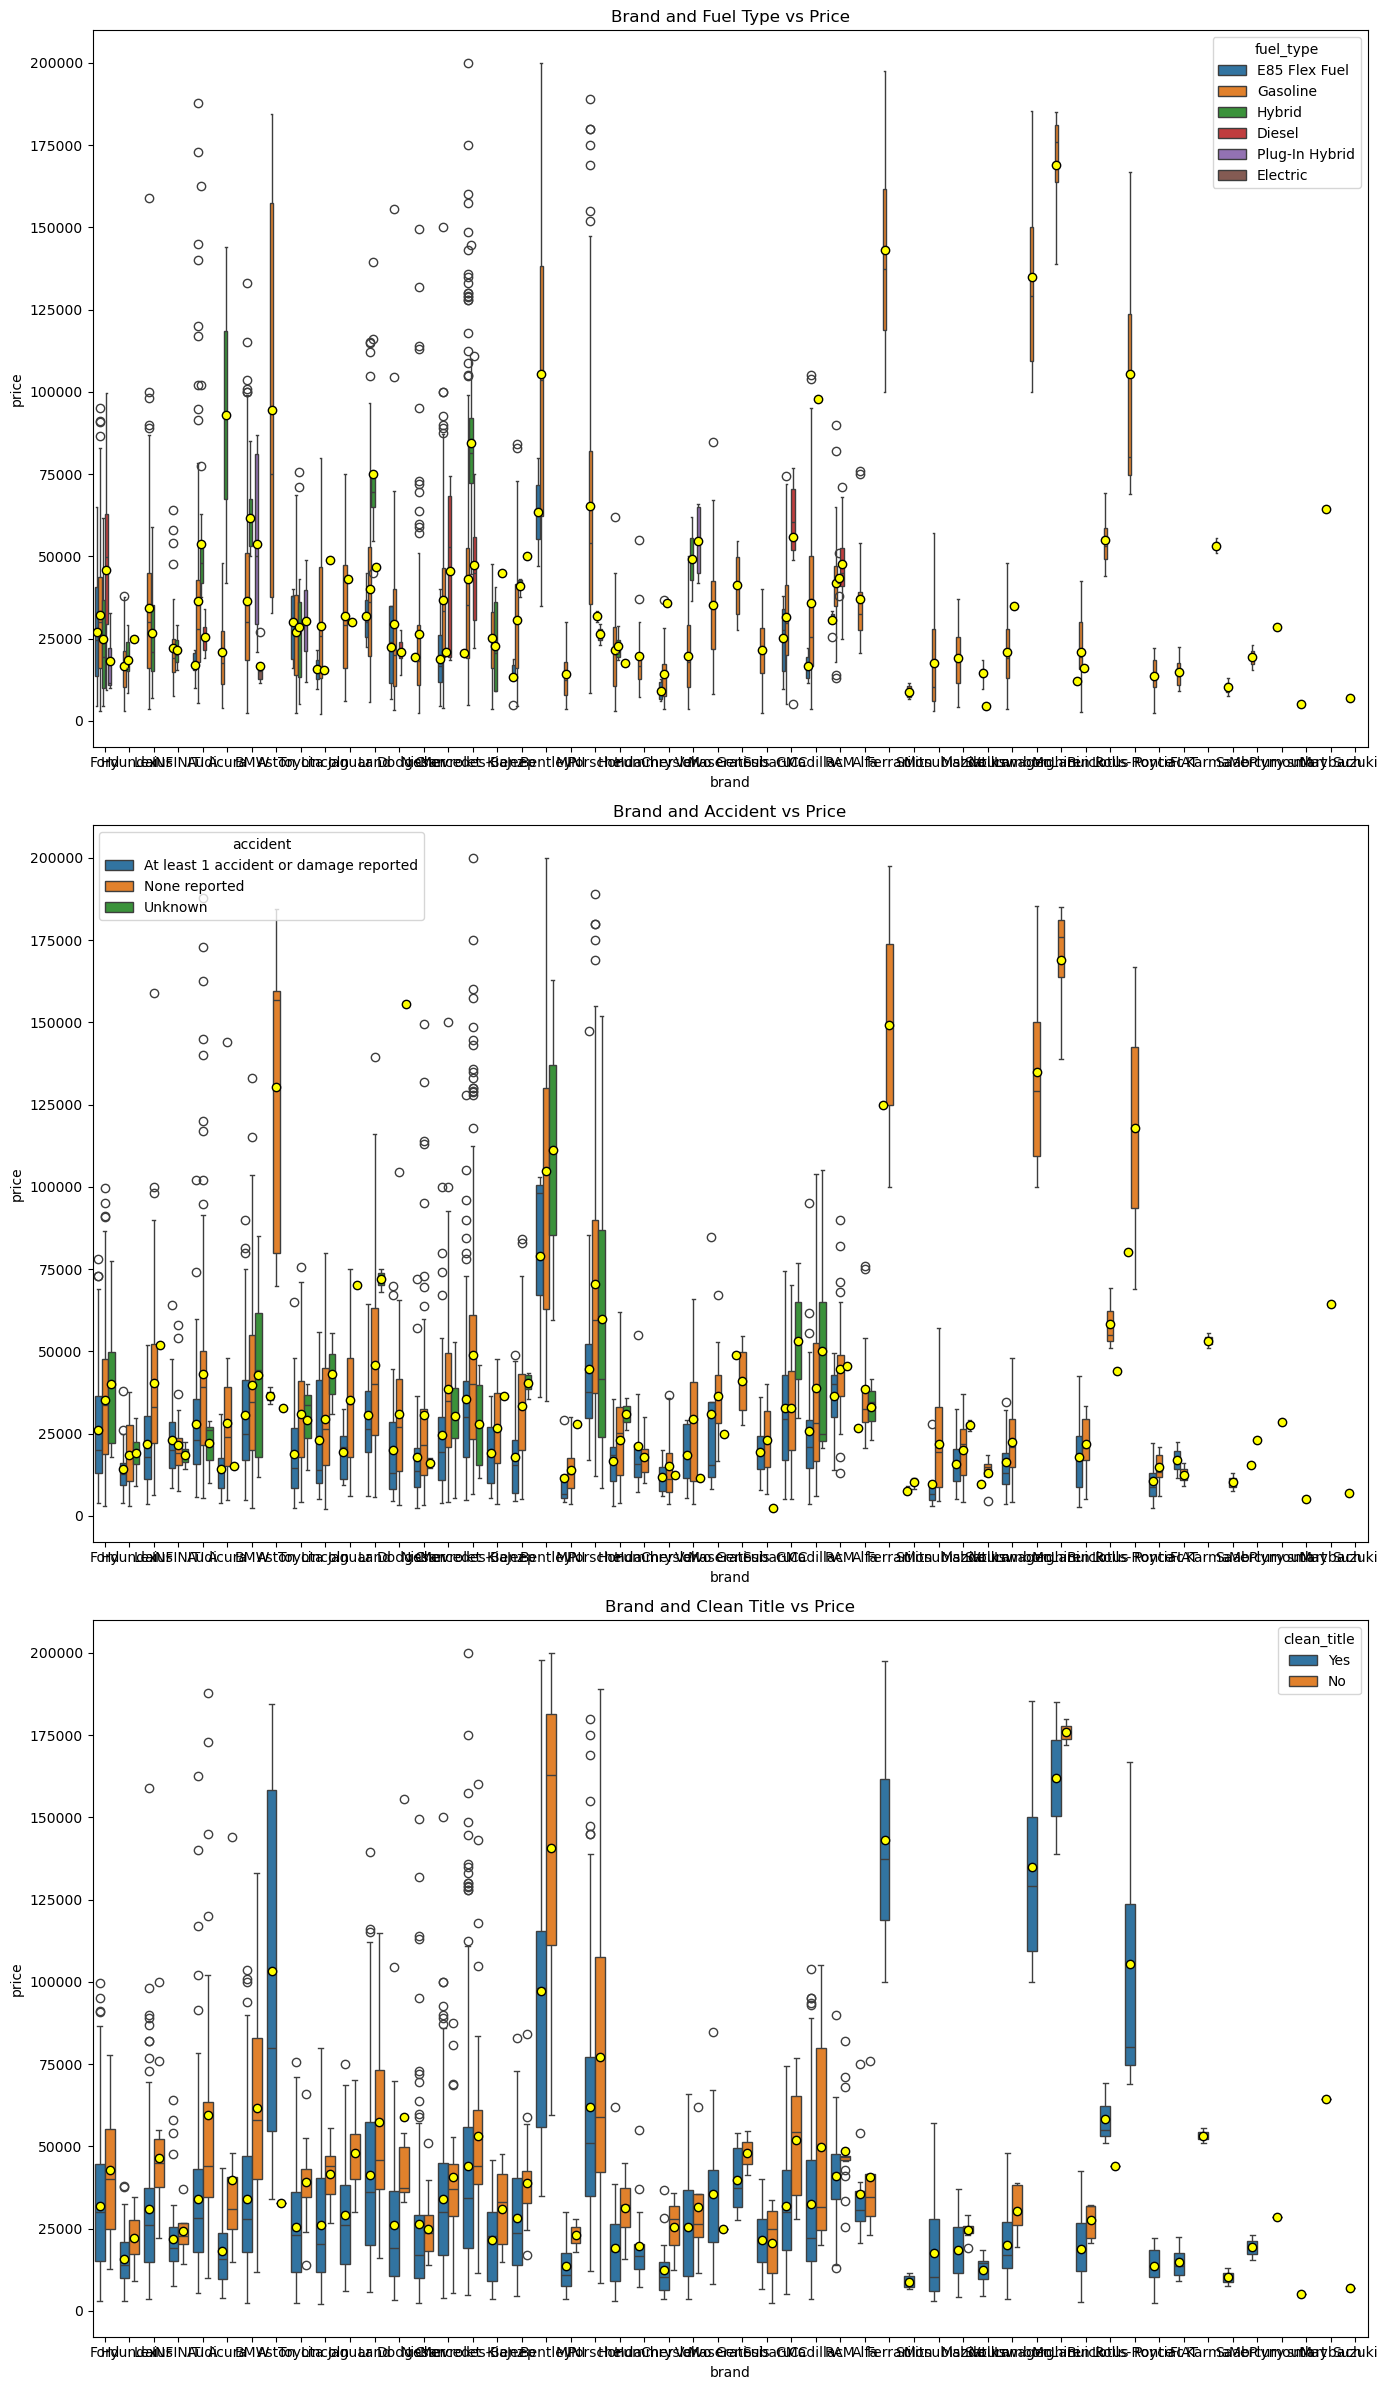

In [16]:
# Multivariate analysis for brand
# Your code goes here
f, axes = plt.subplots(3, 1, figsize=(14, 24), sharex=False)

# Plot Brand and Fuel Type vs Price
sns.boxplot(x='brand', y='price', hue='fuel_type', data=df, ax=axes[0], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"yellow", "markeredgecolor":"black"})
axes[0].set_title('Brand and Fuel Type vs Price')

# Plot Brand and Accident vs Price
sns.boxplot(x='brand', y='price', hue='accident', data=df, ax=axes[1], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"yellow", "markeredgecolor":"black"})
axes[1].set_title('Brand and Accident vs Price')

# Plot Brand and Clean Title vs Price
sns.boxplot(x='brand', y='price', hue='clean_title', data=df, ax=axes[2], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"yellow", "markeredgecolor":"black"})
axes[2].set_title('Brand and Clean Title vs Price')
plt.tight_layout()
plt.show()

**Answer: **[2 points]****
Brand and Fuel Type vs Price:
- Gasolinees tend to have higher price points across various brands, with a noticeable number of outliers indicating somgasoline and hybridic vehicles are priced significantly higher than the averag

Brand and Accident vs Price: 
- 
Vehicles with no accidents reported generally have higher median prices across most brands, which is expected as accidents can devalue a vehicle.
The 'Unknown' category for accidennormally ts does not show a large deviation in median price from the 'None reported' category, indicating that the lack of accident information might not be heavily factored into the prici

Brand and Clean Title vs Price:
- 
Vehicles wioutth a clean title have higher median prices across all bran. .
The spread of prices for vehicles woutith a clean title is larger than for those without, indicating a broader range of prices and possibly encompassing more luxury or premium mode

In conclusion
In the same brand, vehicles with gasoline, none reported accident and no clean title have a higher price. 


ls.ng.e.

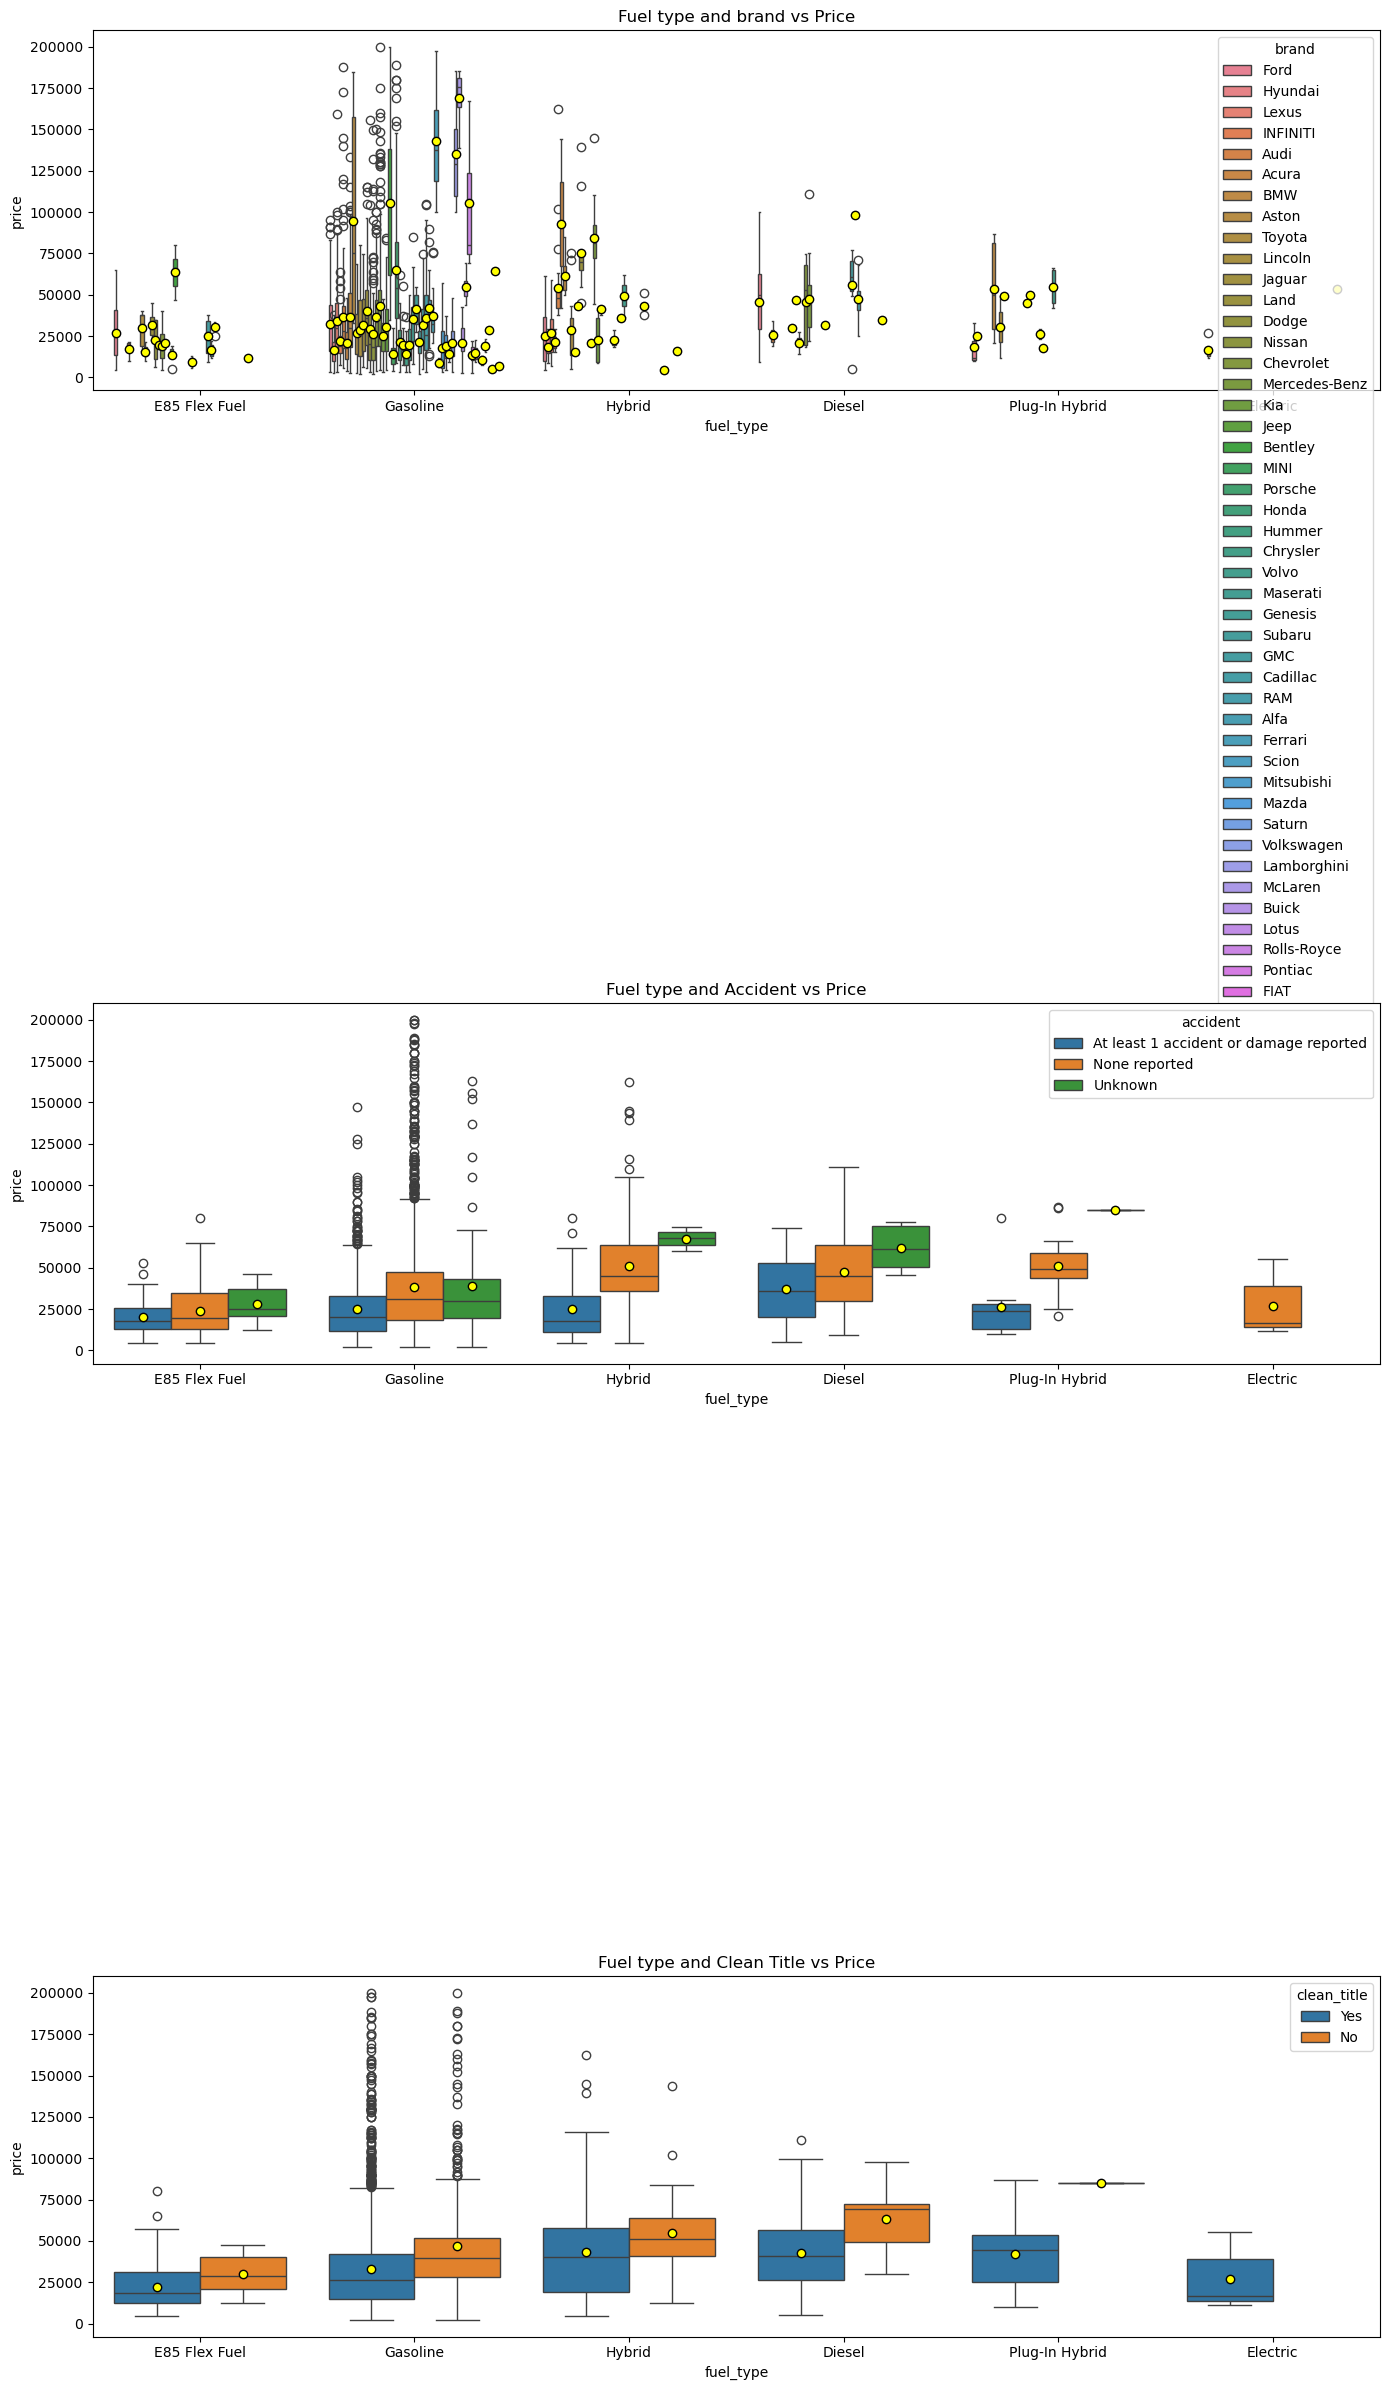

In [17]:
# Multivariate analysis for fuel_type
# Your code goes here
f, axes = plt.subplots(3, 1, figsize=(14, 24), sharex=False)

# Plot Fuel Type and Brand vs Price
sns.boxplot(x='fuel_type', y='price', hue='brand', data=df, ax=axes[0], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"yellow", "markeredgecolor":"black"})
axes[0].set_title('Fuel type and brand vs Price')

# Plot Fuel Type and Accident vs Price
sns.boxplot(x='fuel_type', y='price', hue='accident', data=df, ax=axes[1], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"yellow", "markeredgecolor":"black"})
axes[1].set_title('Fuel type and Accident vs Price')

# Plot Fuel Type and Clean Title vs Price
sns.boxplot(x='fuel_type', y='price', hue='clean_title', data=df, ax=axes[2], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"yellow", "markeredgecolor":"black"})
axes[2].set_title('Fuel type and Clean Title vs Price')
plt.tight_layout()
plt.show()

**Answer: **[1.5 points]****

Fuel Type and Brand vs Price:

- Most cars are gasoline and plug-in hybrids have the least outliers.

Fuel Type and Accident vs Price:
- The median prices for vehicles with unknown accidents are consistently higher than those with reported accidents across all fuel types, which aligns with the expectation that accidents devalue vehicles. However, the non-reported accidents have higher upper whiskers..tFuel typerand and Clean Title vs Price:

- Vehicles without a clean title have higher median prices across afuel typsends. The spread of prices for vehicles without a clean title is larger than for those without, indicating a broader range of prices and possibly encompassing more luxury or premium models.

In conclusion
In the sfuel type, accidents have the highest effect.ce. 

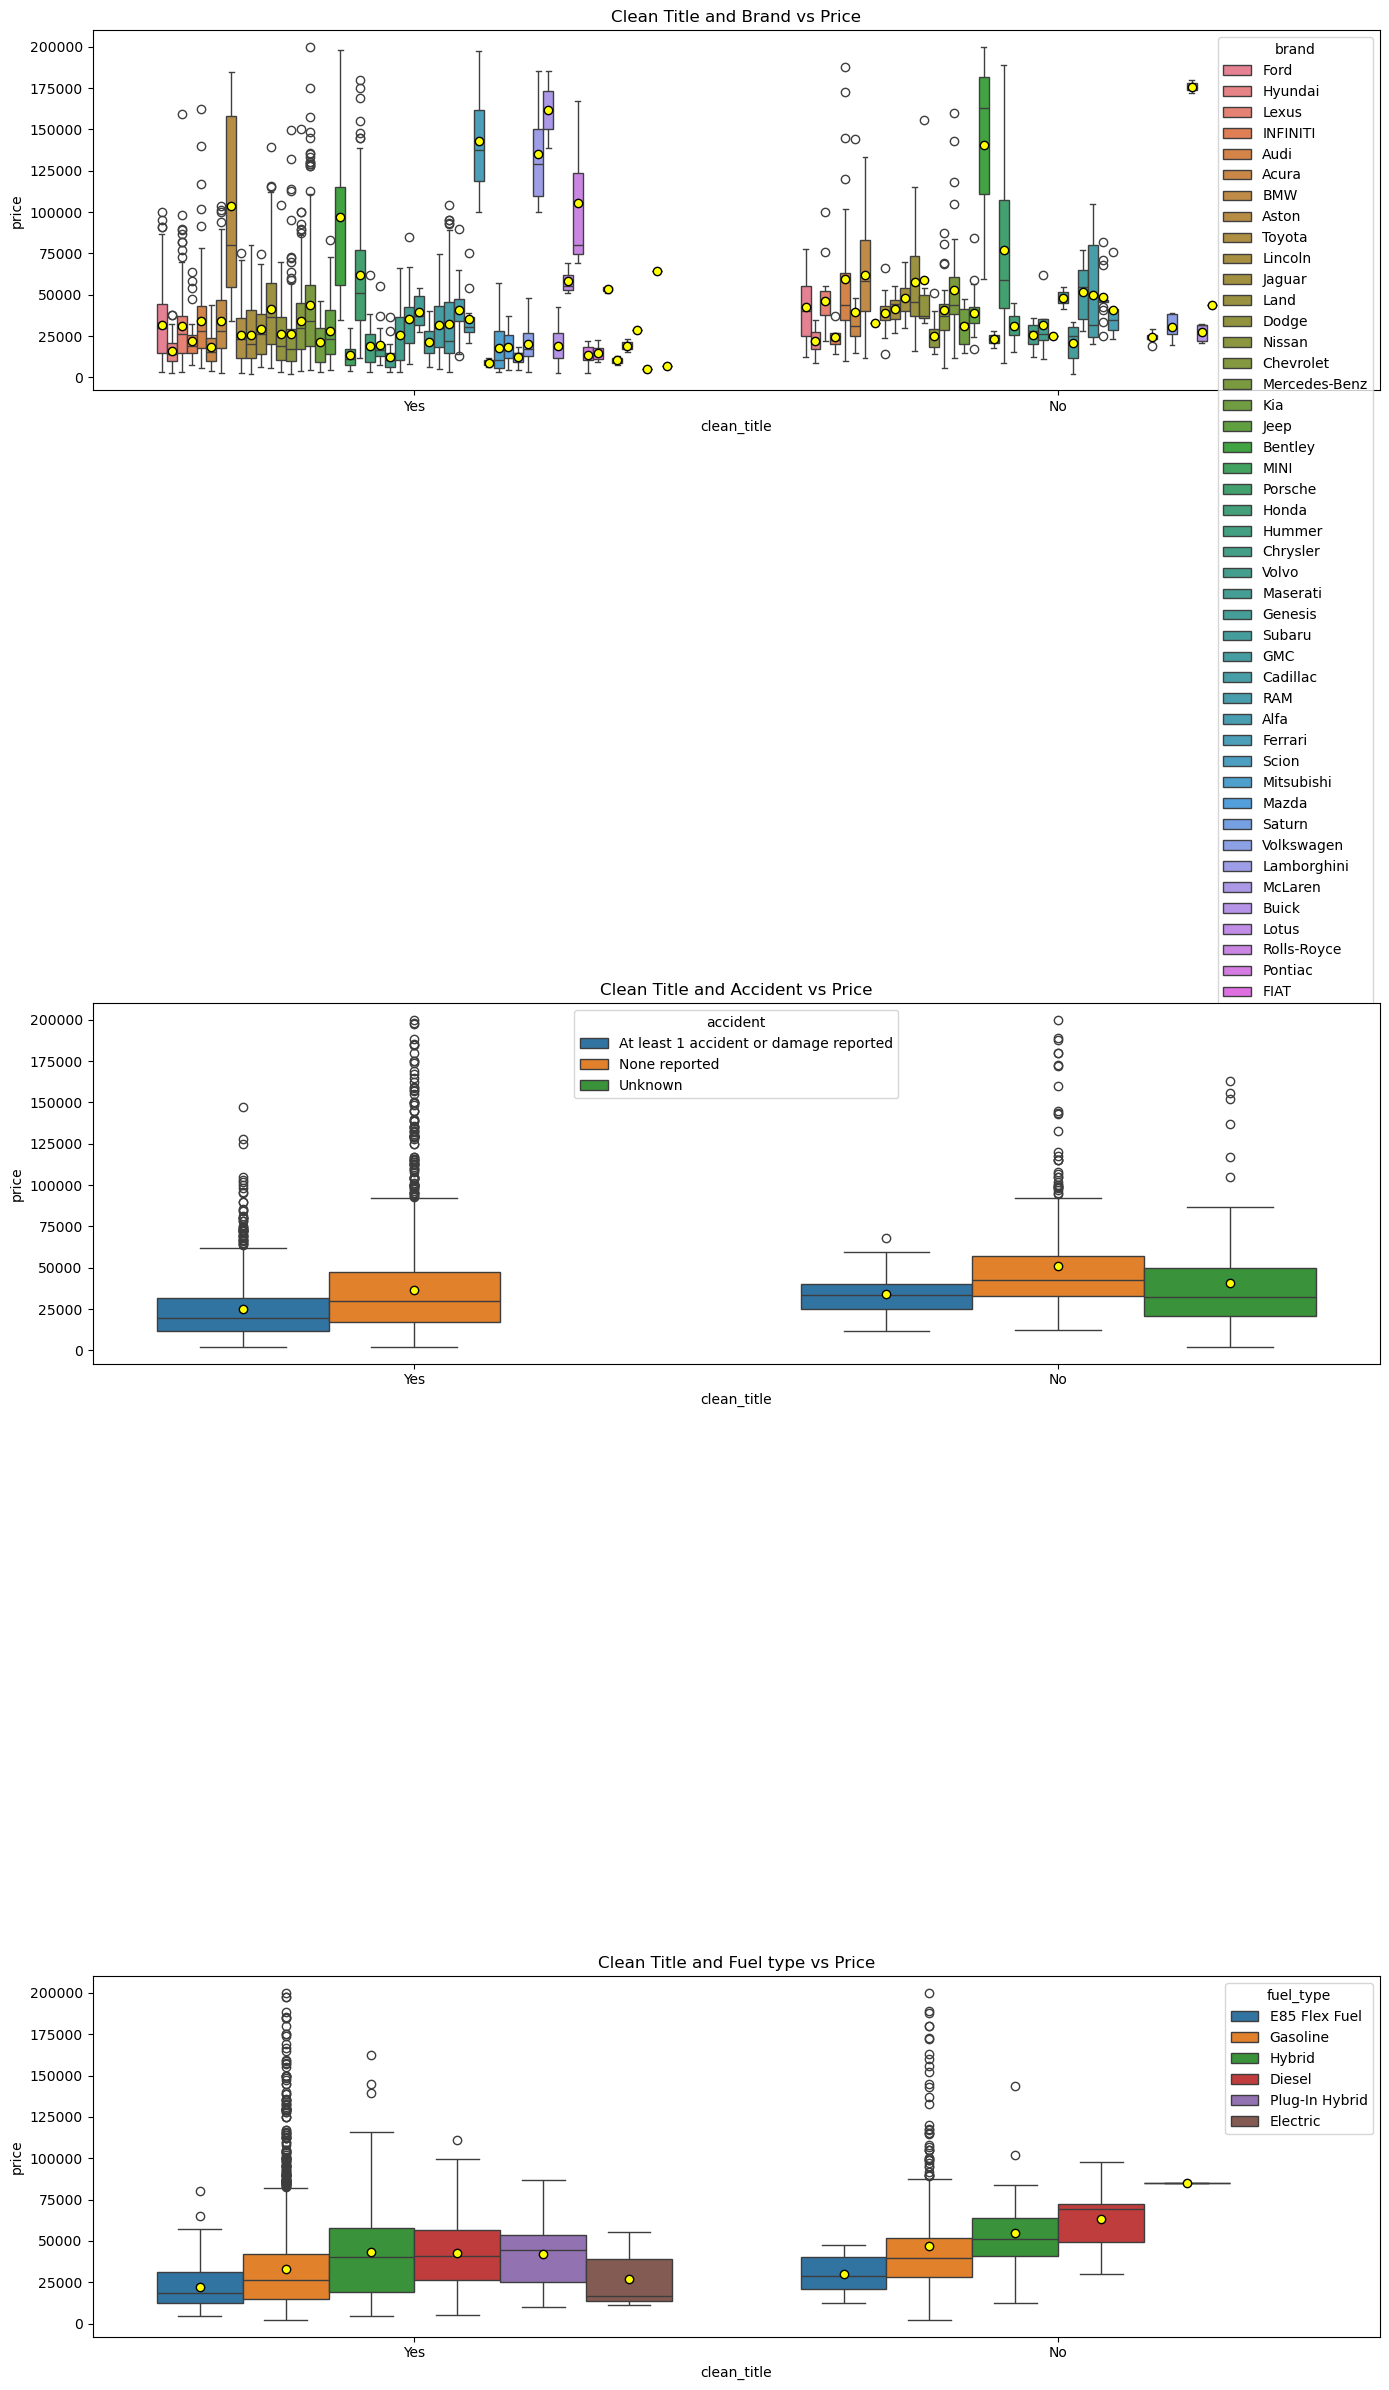

In [18]:
# Multivariate analysis for clean_title
# Your code goes here
f, axes = plt.subplots(3, 1, figsize=(14, 24), sharex=False)

# Plot Clean Title and Brand Type vs Price
sns.boxplot(x='clean_title', y='price', hue='brand', data=df, ax=axes[0], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"yellow", "markeredgecolor":"black"})
axes[0].set_title('Clean Title and Brand vs Price')

# Plot Clean Title and Accident vs Price
sns.boxplot(x='clean_title', y='price', hue='accident', data=df, ax=axes[1], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"yellow", "markeredgecolor":"black"})
axes[1].set_title('Clean Title and Accident vs Price')

# Plot Clean Title and Fuel type vs Price
sns.boxplot(x='clean_title', y='price', hue='fuel_type', data=df, ax=axes[2], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"yellow", "markeredgecolor":"black"})
axes[2].set_title('Clean Title and Fuel type vs Price')
plt.tight_layout()
plt.show()

**Answer: [1 point]**

In conclusion
Brand have the highest effect.

# Q3: Predicting prices **[62 points]**

After a long day at the office, you and N. go to a local bar to catch up with your old friend W. Over a round of cold drinks, you begin to share the great news about your booming business. Being an expert in data analytics himself, W. is also curious to hear your plans to apply your data science knowledge.

"I've been thinking about selling my old Porsche to make room for a new one," W. says to you. "I'm wondering what price to set for the old one. This is the perfect opportunity for you to try out your new predictive models, don't you think?"

You agree! W. writes down the properties of his Porsche (in the following, also referred to as *target car*) on a napkin. You tell W. that you will call him as soon as you can make a confident estimate for the price of his car. The next morning, you immediately start working on predictive models for car prices.
If not sated otherwise, you use the entire pre-processed dataset to create each of the models - load the dataset new at the beginning of every partial question a), b),...d) so you don't accidentally use data you have changed for a different kind of model. 


In [19]:
car = pd.DataFrame([{
      "brand": "Porsche",
      "model":  "911 Carrera S",
      "model_year": 2015,
      "milage": 84500.0,
      "fuel_type": "Gasoline",
      "engine": "400.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel",
      "transmission": "7-Speed A/T",
      "ext_col": "Black",
      "int_col": "Black",
      "accident": "None reported",
      "clean_title": "Yes",
      "horsepower": 400.0,
      "litres": 3.8,
      "cylinders": 6.0
}])

## (a) Baseline **[2 points]**

First, you want to set a baseline to compare against. The baseline should always use the average price of all cars as a recommended price. Use the pre-processed dataset and the `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`. To stay consistent, the same split between training and test set should be used throughout the entire assignment.

What are the values of the mean absolute error and the root-mean-squared error? 

**[2 points]**

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
# Your code here
descriptive_features = ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'horsepower', 'litres', 'cylinders']
label = 'price'

data_descriptive = df[descriptive_features].values
data_label = df[label].values

descriptive_train, descriptive_test, price_train, price_test = train_test_split(data_descriptive, data_label, test_size=0.05, random_state=3)
price_baseline = df['price'].mean()

price_pred = [price_baseline] * len(price_test)

# calculate the MAE of the predictions
mae = mean_absolute_error(price_test, price_pred)
rmse = np.sqrt(mean_squared_error(price_test, price_pred))
mae,rmse



(20529.133946786096, 30574.430484437165)

## (b) Prediction by classification **[16 points]**

Next, you try to price your car according to similar cars using a decision tree.

### (i) Price binning

In the following, we want to know the price ranges for selling cars. To use decision trees, you need to discretize prices. We use the following price bins:
- [1,800, 10,000]
- (10,000, 20,000]
- (20,000, 30,000]
- (30,000, 40,000]
- (40,000, 50,000]
- (50,000, 60,000]
- (60,000, 80,000]
- (80,000, 100,000]
- (100,000, 120,000]
- (120,000, 140,000]
- (140,000, 160,000]
- (160,000, 180,000]
- (180,000, 220,000]

Add the attribute *Price_Bins* to the entire pre-processed data set using the discretization mentioned above for each car. For example, if a car costs 2500, it is put into the bin [1,800, 10,000]. 

**[1 point]**

In [21]:
# Your code here
def discretization(price):
    if price < 1800:
        print('exceptional value: ', price)
        return 'NaN'
    elif price <= 10000:
        return '[1800,10000]'
    elif price <= 20000:
        return '(10000,20000]'
    elif price <= 30000:
        return '(20000,30000]'
    elif price <= 40000:
        return '(30000,40000]'
    elif price <= 50000:
        return '(40000,50000]'
    elif price <= 60000:
        return '(50000,60000]'
    elif price <= 80000:
        return '(60000,80000]'
    elif price <= 100000:
        return '(80000,100000]'
    elif price <= 120000:
        return '(100000,120000]'
    elif price <= 140000:
        return '(120000,140000]'
    elif price <= 160000:
        return '(140000,160000]'
    elif price <= 180000:
        return '(160000,180000]'
    elif price <= 220000:
        return '(180000,220000]'
    elif price > 220000:
        print('exceptional value: ', price)
        return 'NaN'

df = df.assign(Price_Bins=lambda x : x['price'].apply(discretization))

df


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,horsepower,litres,cylinders,Price_Bins
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300,300.0,3.7,6.0,"(10000,20000]"
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,White,Gray,At least 1 accident or damage reported,Yes,38005,318.0,3.8,6.0,"(30000,40000]"
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,54598,336.0,3.5,6.0,"(50000,60000]"
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500,354.0,3.5,6.0,"(10000,20000]"
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Green,Black,None reported,No,34999,333.0,2.0,4.0,"(30000,40000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3526,Volkswagen,Routan SE,2011,194000,Gasoline,283.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Gray,At least 1 accident or damage reported,Yes,3500,283.0,3.6,6.0,"[1800,10000]"
3527,Mercedes-Benz,E-Class E 300 4MATIC,2018,53705,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Black,Black,At least 1 accident or damage reported,Yes,25900,241.0,2.0,4.0,"(20000,30000]"
3528,Audi,S4 3.0T Premium Plus,2022,10900,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900,349.0,3.0,6.0,"(50000,60000]"
3529,Ford,F-150 Raptor,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,62999,450.0,3.5,6.0,"(60000,80000]"


You predicted a price range for cars. However, since you cannot enter a price range for selling a car, you have to map each bin to a value. To do so, you use the mean of bins to predict the price. For example, the bin (10,000, 20,000] is mapped to 15,000. Create a dictionary you can use for this mapping. 

**[1 point]**

In [22]:
# Your code here
df.loc[df['Price_Bins'] == '[1800,10000]', "Price_Bins"] = 5900
df.loc[df['Price_Bins'] == '(10000,20000]', "Price_Bins"] = 15000
df.loc[df['Price_Bins'] == '(20000,30000]', "Price_Bins"] = 25000
df.loc[df['Price_Bins'] == '(30000,40000]', "Price_Bins"] = 35000
df.loc[df['Price_Bins'] == '(40000,50000]', "Price_Bins"] = 45000
df.loc[df['Price_Bins'] == '(50000,60000]', "Price_Bins"] = 55000
df.loc[df['Price_Bins'] == '(60000,80000]', "Price_Bins"] = 70000
df.loc[df['Price_Bins'] == '(80000,100000]', "Price_Bins"] = 90000
df.loc[df['Price_Bins'] == '(100000,120000]', "Price_Bins"] = 110000
df.loc[df['Price_Bins'] == '(120000,140000]', "Price_Bins"] = 130000
df.loc[df['Price_Bins'] == '(140000,160000]', "Price_Bins"] = 150000
df.loc[df['Price_Bins'] == '(160000,180000]', "Price_Bins"] = 170000
df.loc[df['Price_Bins'] == '(180000,220000]', "Price_Bins"] = 200000

### (ii) Data transformation for decision trees

Using the dataframe extenden by the "Price_Bins" column, consider *brand*, *fuel_type*, *model_year*, *accident* and *clean_title* as descriptive features and *Price_Bins* as the target feature. Encode the categorical variables and split your data into a test and training set like before. For the train-test split, use `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05` again. 

**[2 points]**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Your code here
df['Price_Bins'] = df['Price_Bins'].astype(str)
descriptive_features = ['brand', 'model_year',  'fuel_type', 'accident', 'clean_title']
target_feature  = 'Price_Bins'

X = df[descriptive_features]
y = df[target_feature]

#Encode
categorical_features = ['brand', 'fuel_type', 'accident', 'clean_title']
one_hot_encoder = OneHotEncoder(sparse=False)
column_transformer = ColumnTransformer(transformers=[
    ('cat', one_hot_encoder, categorical_features)
], remainder='passthrough')

X_encoded = column_transformer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.05, random_state=3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\tianx\anaconda3\envs\env-ids-ws23\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((3354, 64), (177, 64), (3354,), (177,))

### (iii) Model training

In the following, you want to use a good deicision tree for predicting prices. To do so,you want to test a set of different values, in particular, max depth of a tree. You test values in [1, 9] (in steps of size one).

You use the the algorithm from the *sklearn* library. You set as criterion "entropy", `min_samples_leaf=6`, and `random_state=42`.

Your goal is to minimize the mean absolute error. Create the prediction using the bins and only apply the dictionary mapping the bins to means to the predicted values before calculating the error. 

Create a summarizing plot, in which the x-axis represents the maximum tree depth, and the y-axis the mean absolute error as well as the root-mean-square error.

**[5 points]**

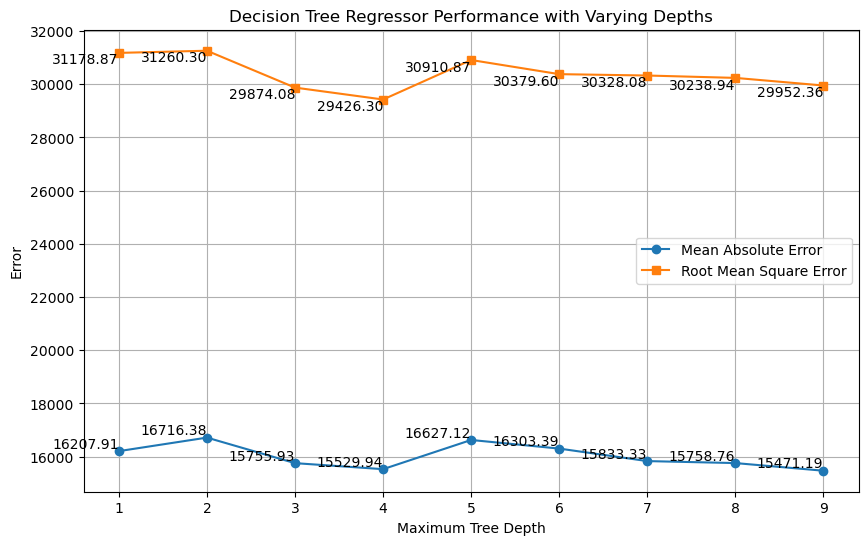

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
# Your code here
#bin_to_mean = df.groupby('Price_Bins')['price'].mean().to_dict()
#print(bin_to_mean)
max_depths = range(1, 10)
mae_scores = []
rmse_scores = []

max_depths = range(1, 10)
mae_scores = []
rmse_scores = []

for depth in max_depths:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, min_samples_leaf=6, random_state=42)
    model.fit(X_train, y_train)
    
    # Predicting the test set
    predictions = model.predict(X_test)

    # Calculating errors
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae_scores.append(mae)
    rmse_scores.append(rmse)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, mae_scores, marker='o', label='Mean Absolute Error')
plt.plot(max_depths, rmse_scores, marker='s', label='Root Mean Square Error')

for i in range(len(max_depths)):
    plt.text(max_depths[i], mae_scores[i], f'{mae_scores[i]:.2f}', ha='right', va='bottom')
    plt.text(max_depths[i], rmse_scores[i], f'{rmse_scores[i]:.2f}', ha='right', va='top')


plt.xlabel('Maximum Tree Depth')
plt.ylabel('Error')
plt.title('Decision Tree Regressor Performance with Varying Depths')
plt.legend()
plt.grid(True)
plt.show()
    

Condider your plot, which setting minimizes the mean absolute error and which minimizes the root-mean-square error? Which tree depth would you favorize and what are the error values? Round to the second decimal.  

**[2 point]**

**Answer:**
Both 4 minimize the mean absolute error and root-mean-square error, I would choose tree depth 4 and the error value is MAE 29426.30 and root-mean-square error 15529.94


Create and plot the tree. What is the first attribute to split on? 

**[2 points]**


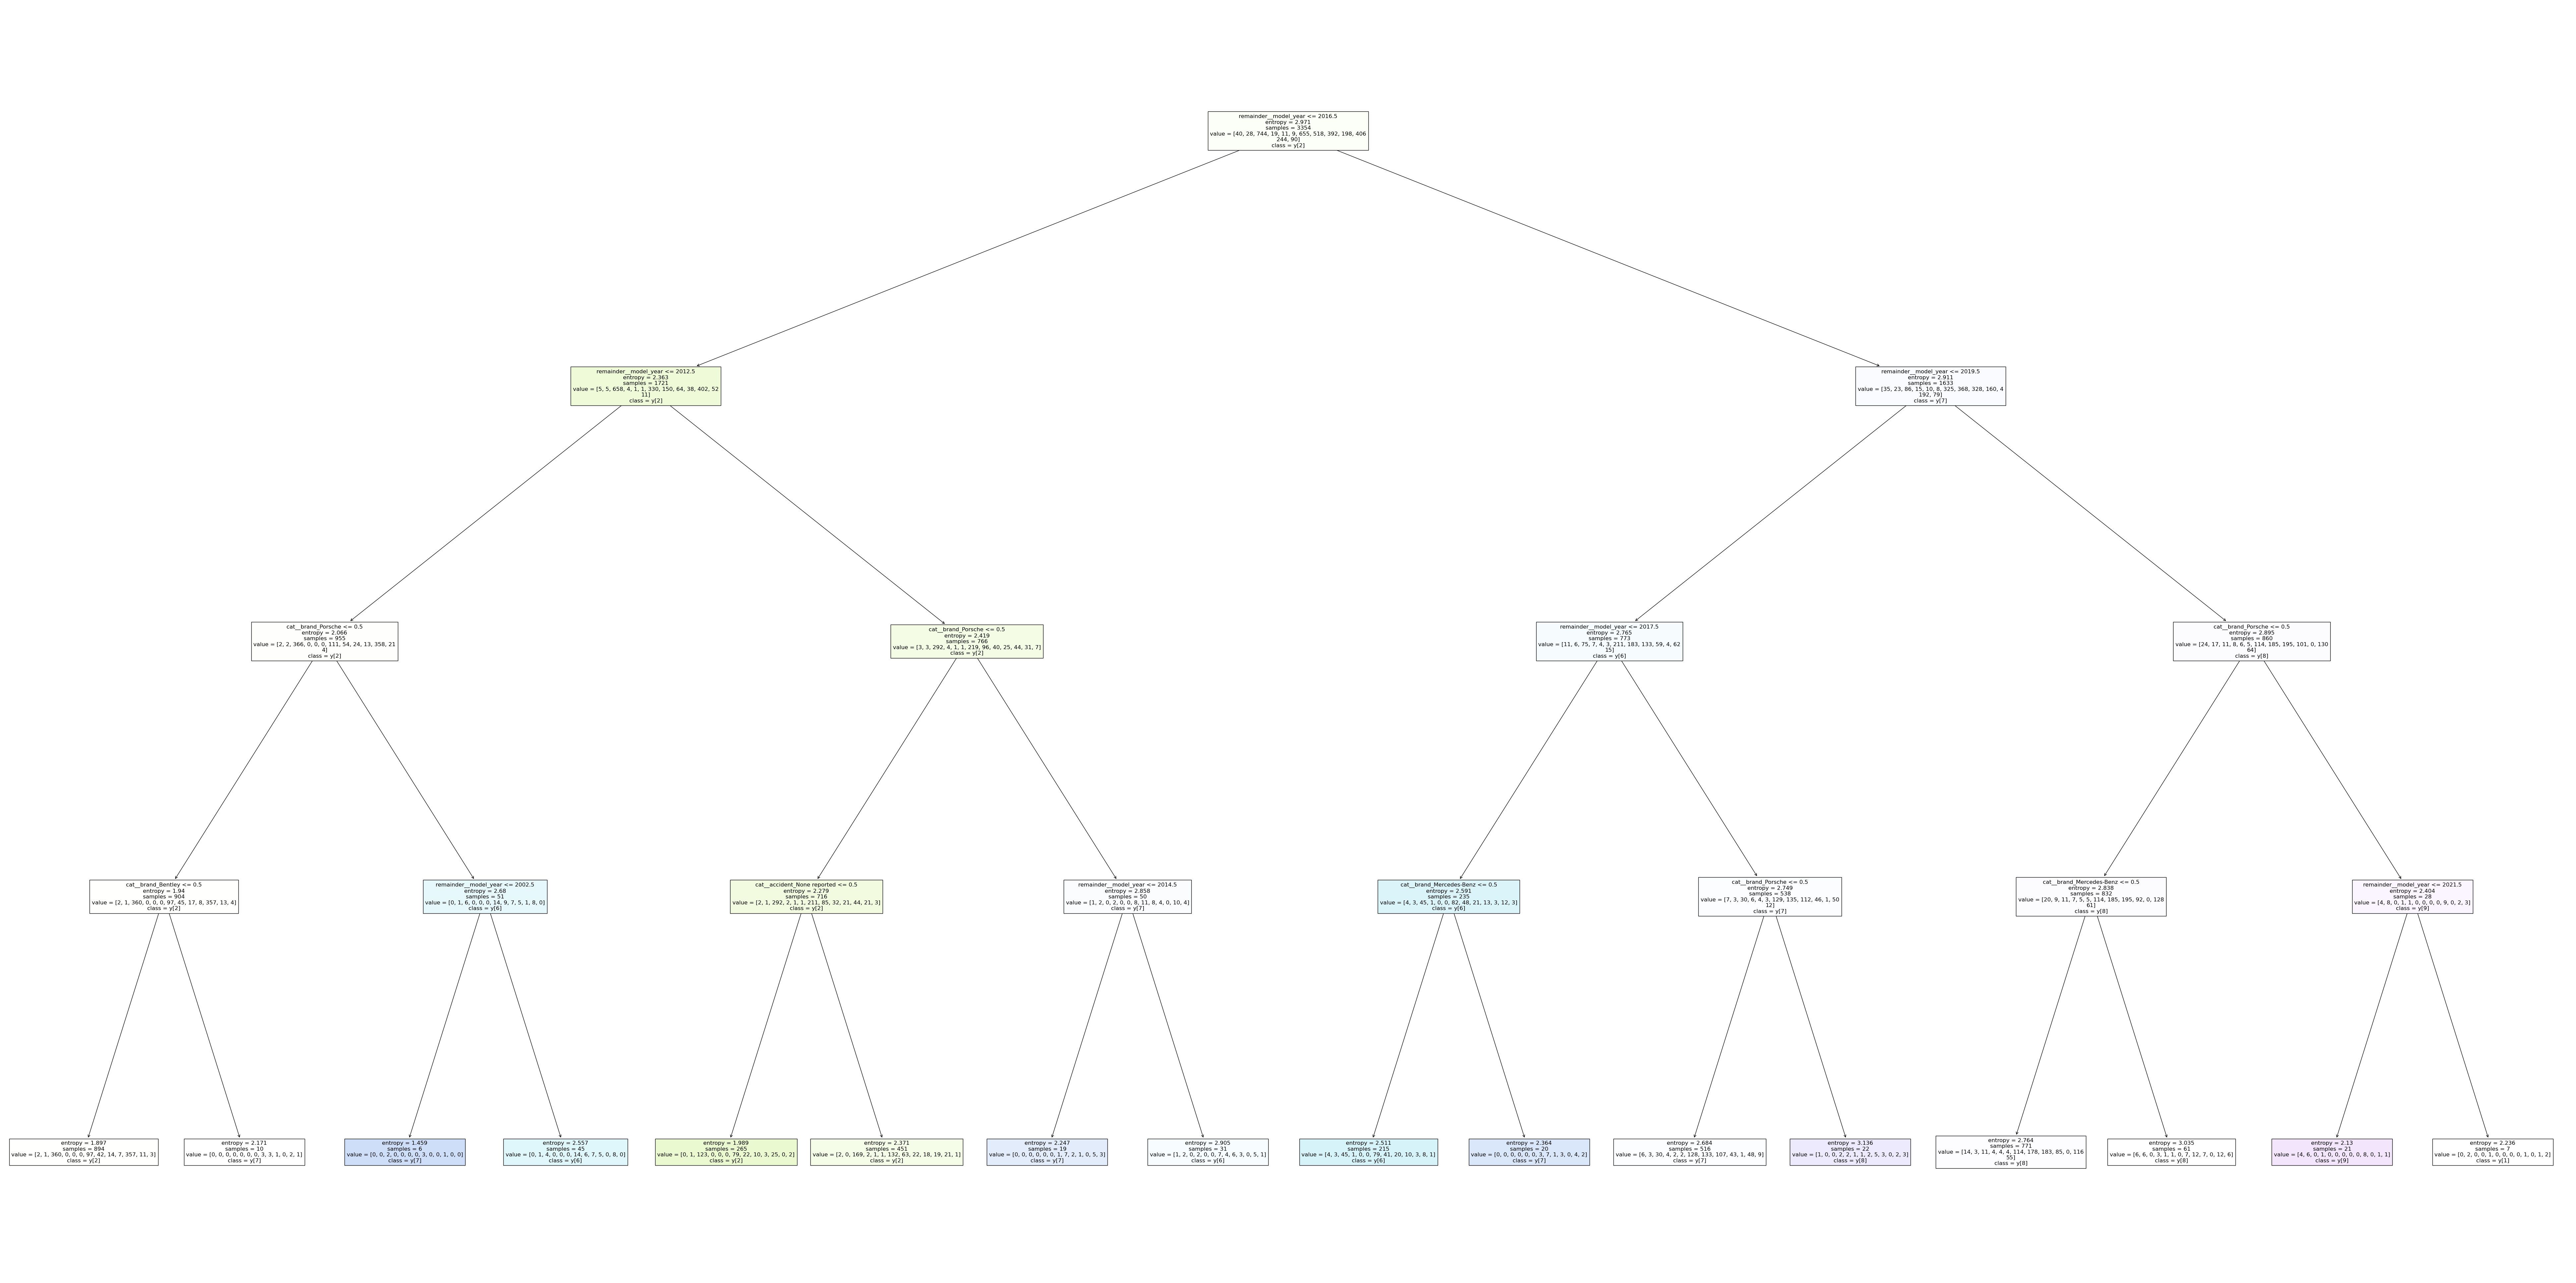

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Your code here
optimal_depth = 4
model = DecisionTreeClassifier(criterion='entropy', max_depth=optimal_depth, min_samples_leaf=6, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(100, 50))
plot_tree(model, feature_names=column_transformer.get_feature_names_out(), class_names=True, filled=True)
plt.show()

**Answer:** 

*Your answer here*

What price range does your tree suggest for the following cars:

- Porsche, 2004, Gasoline, none accident, and clean title
- Mercedes-Benz, 2017, Hybrid, unknown accident, and clean title

**[2 points]**

In [26]:
input_data = pd.DataFrame({
    'brand': ['Porsche', 'Mercedes-Benz'],
    'fuel_type': ['Gasoline', 'Hybrid'],
    'model_year': [2004, 2017],
    'accident': ['None reported', 'Unknown'],
    'clean_title': ['Yes', 'Yes']
})
input_encoded = column_transformer.transform(input_data)
predicted_bins = model.predict(input_encoded)
predicted_bins

array(['25000', '35000'], dtype=object)

**Answer**
For the Porsche (2004, Gasoline, no accident, clean title), the predicted price range is approximately 25,000.
For the Mercedes-Benz (2017, Hybrid, unknown accident status, clean title), the predicted price range is approximately$35,000..

### (iv) Price prediction

Finally, use the decision tree to predict the price of W.'s car. What is the predicted price? Derive the value from the visualized tree manually (do not use the model's `predict` method). Provide the mean, not the bin.

**[1 point]**

**Answer**: 

25000

## (c) Prediction by clustering **[21 points]**

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import DistanceMetric
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.spatial.distance import cdist
import statistics

In [28]:
# Import dataset
df = pd.read_csv("used_cars_preprocessed.csv")

You come up with another idea to give W. an estimate on his car price. You want to use clustering to find similar cars and use their average price as an estimate.

In this task you use DBSCAN to determine clusters of similar cars. For each cluster, you calculate the mean price as a representative. To predict the price for new cars, you assign it to an existing cluster and give the mean price as prediction.

### (i) Data transformation for clustering 

Use *brand*, *milage*, *fuel_type*, *accident*, *clean_title* and *horse_power* as descriptive features and *price* as the target feature. Create a test and training set like before. For the train-test split, use again `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`. 

**[1 point]**

In [31]:
# Your code here
descriptive_features = ['brand', 'milage',  'fuel_type', 'accident', 'clean_title', 'horsepower']
target_feature  = 'price'

X = df[descriptive_features]
y = df[target_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=3)




### (ii) Computing the distance matrix

DBSCAN determines clusters based on the distance between different data points. Since some of the features you want to use are not numeric, you have to apply some encoding first to be able to use distance measures. 

For categorical variables, apply ordinal encoding and compute the Hamming distance; for numerical variables, apply standard scaling and compute the Euclidean distance.

For the total distance, first, weight the distance of categorical features by the fraction of categorical variables among the complete feature set. Then, add the distance of numerical features weighted by 1 over the total number of features used.

In other words: Let $x=(x_{cat},x_{num})^T$ and $y=(y_{cat},y_{num})^T$ be two samples where $x_{cat}$ and $y_{cat}$ represent their categorical features, and $x_{num}$ and $y_{num}$ represent their numerical features. Let $n_{cat}$ be the number of categorical features and $n_{num}$ be the number of numerical features. Then, the total distance $d_{tot}(x,y)$ between $x$ and $y$ is given by

$d_{tot}(x,y)=\dfrac{n_{cat}\cdot\Delta(x_{cat},y_{cat})+d(x_{num},y_{num})}{n_{cat}+n_{num}}$

where $\Delta$ is the Hamming distance and $d$ is the Euclidean distance.

Provide a matrix of the computed pairwise total distance between all cars in the training set. Keep the same indexing as in the training set.

**[4 points]**

*Hint*: Use the preprocessing module of sklearn to prepare your dataset for clustering.

*Background*: The Hamming distance is already normed on the number of features used and therefore returns a value between 0 and 1 independent from the number of variables.

In [36]:
# Your code here
categorical_features = ['brand', 'fuel_type', 'accident', 'clean_title']
numerical_features = ['milage', 'horsepower']

ordinal_encoder = OrdinalEncoder()
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train[categorical_features])
X_test_cat_encoded = ordinal_encoder.transform(X_test[categorical_features])


scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_num_scaled = scaler.transform(X_test[numerical_features])

X_train_processed = np.concatenate((X_train_cat_encoded, X_train_num_scaled), axis=1)
X_test_processed = np.concatenate((X_test_cat_encoded, X_test_num_scaled), axis=1)

n_cat = len(categorical_features)
n_num = len(numerical_features)

hamming_dist = cdist(X_train_cat_encoded, X_train_cat_encoded, metric='hamming')
euclidean_dist = cdist(X_train_num_scaled, X_train_num_scaled, metric='euclidean')
total_distance = (n_cat * hamming_dist) + (euclidean_dist / (n_cat + n_num))
total_distance.shape

(3354, 3354)

**Note**: From here on, instead of the distance matrix computed before, use the one provided in `distance.txt`.

In [40]:
# load the new distance matrix
dist = np.genfromtxt("distance.txt", delimiter=",")
dist.shape

(3354, 3354)

### (iii) Applying DBSCAN

According to a common heuristic, set the minPts parameter of DBSCAN to twice the number of features. Show the according k-distance plot (where *k = minPts - 1*).

**[1 point]**

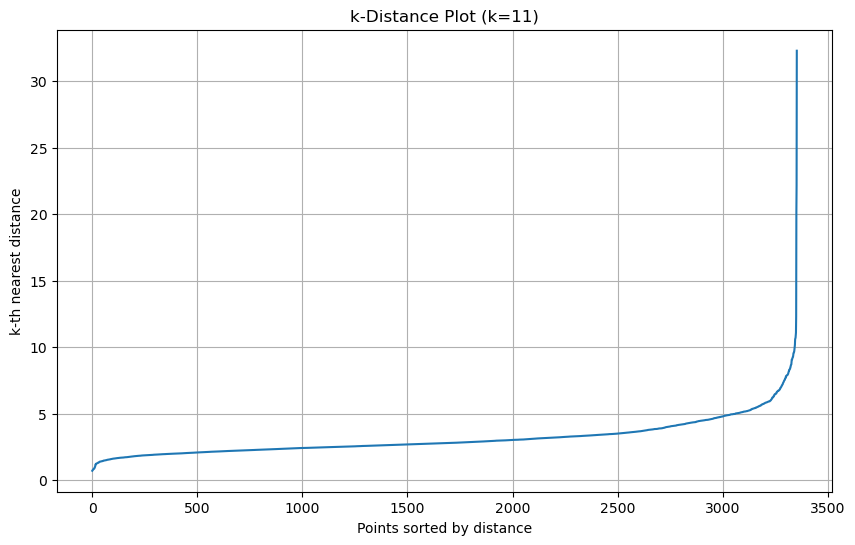

In [44]:
# Your code here
# Setting minPts parameter according to the heuristic (twice the number of features)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
num_features = 6  
minPts = 2 * num_features


k = minPts - 1

# Using NearestNeighbors to find the distance to the k-th nearest neighbor for each point
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(dist)
distances, indices = nearest_neighbors.kneighbors(dist)
# Sorting the distances
sorted_distances = np.sort(distances[:, k-1], axis=0)


plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title(f"k-Distance Plot (k={k})")
plt.xlabel("Points sorted by distance")
plt.ylabel("k-th nearest distance")
plt.grid(True)
plt.show()

Now you have to determine values for the *epsilon* parameter. Based on the previous plot, perform DBSCAN where you vary *epsilon* in the interval (0.0, 0.2] by steps of 0.01.

Draw a diagram with the parameter *epsilon* (between 0.01 and 0.2) on the x-axis and the percentage of 
- clustered samples,
- samples in the largest component,
- and noise

on the y-axis.

In a second diagram, plot the number of clusters over *epsilon*.

Based on these diagrams, which value for *epsilon* seems to be most suitable? Explain your answer. 

**[4 points]**

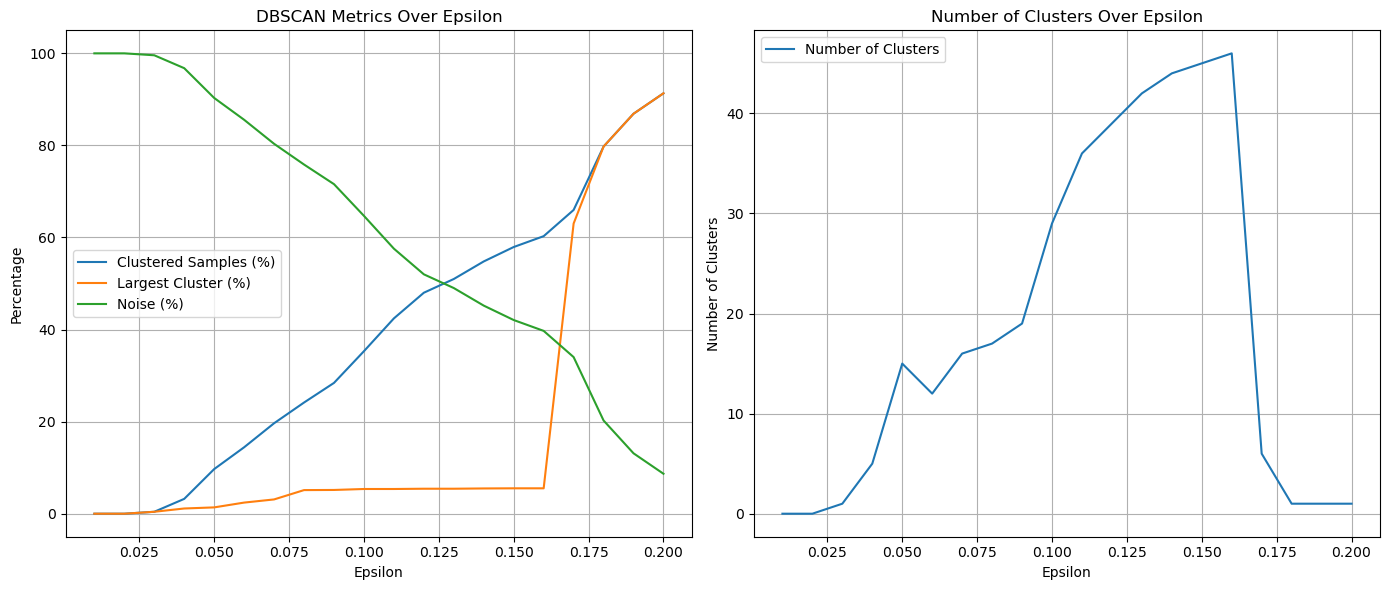

In [46]:
# Your code here
eps_values = np.arange(0.01, 0.21, 0.01)

# Arrays to store the results
percent_clustered = []
percent_largest_cluster = []
percent_noise = []
num_clusters = []

# Perform DBSCAN for each epsilon value
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=minPts, metric='precomputed')
    labels = dbscan.fit_predict(dist)

    # Calculating metrics
    n_clustered = np.sum(labels != -1)
    n_noise = np.sum(labels == -1)
    n_samples = len(labels)
    
    # Percentage of clustered samples and noise
    percent_clustered.append(n_clustered / n_samples * 100)
    percent_noise.append(n_noise / n_samples * 100)

    # Identifying the largest cluster
    largest_cluster_size = np.max(np.bincount(labels[labels != -1])) if n_clustered > 0 else 0
    percent_largest_cluster.append(largest_cluster_size / n_samples * 100)


    num_clusters.append(len(set(labels)) - (1 if -1 in labels else 0))


plt.figure(figsize=(14, 6))

# Plot 1: Percentages of clustered samples, samples in the largest component, and noise
plt.subplot(1, 2, 1)
plt.plot(eps_values, percent_clustered, label='Clustered Samples (%)')
plt.plot(eps_values, percent_largest_cluster, label='Largest Cluster (%)')
plt.plot(eps_values, percent_noise, label='Noise (%)')
plt.xlabel('Epsilon')
plt.ylabel('Percentage')
plt.title('DBSCAN Metrics Over Epsilon')
plt.legend()
plt.grid(True)

# Plot 2: Number of clusters over epsilon
plt.subplot(1, 2, 2)
plt.plot(eps_values, num_clusters, label='Number of Clusters')
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.title('Number of Clusters Over Epsilon')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Answer**: 

In the provided diagrams, this point appears to be around ε = 0.1 to ε = 0.125. Here, the noise percentage is lower, a significant proportion of samples are clustered, and the number of clusters is relatively stable. Beyond this point, the number of clusters decreases sharply, which indicates that increasing ε further leads to over-clustering, where distinct clusters are likely being merged into larger, less meaningful ones.

**Note**: No matter the conclusion made in the previous task, from now on, use the clustering model with *epsilon = 1/6* for predicting the price of W.'s car and evaluating the clustering technique.

Apply DBSCAN clustering to your training set based on the provided distance matrix. Answer the following questions:
- How many clusters are identified?
- What is their average size?
- What is the size of the largest cluster (absolute and relative)?
- How large is the percentage of unclustered samples (noise)?

**[4 points]**

In [53]:
# Your code here
epsilon = 1/6
dbscan = DBSCAN(eps=epsilon, min_samples=2*num_features, metric='precomputed')
dbscan.fit(dist)
labels = dbscan.labels_

# Number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print('number of clusters:')
print(n_clusters)

# Average size of clusters
cluster_sizes = np.bincount(labels[labels >= 0])
average_size = np.mean(cluster_sizes)
print('average size:')
print(average_size)

# Size of the largest cluster
largest_cluster_size = np.max(cluster_sizes)
print('size of the largest cluster')
print(largest_cluster_size)

# Relative size of the largest cluster
relative_size_largest_cluster = largest_cluster_size / sum(cluster_sizes)
print(relative_size_largest_cluster)

# Percentage of noise
percent_noise = np.sum(labels == -1) / len(labels) * 100
print('noise:')
print(percent_noise)

number of clusters:
40
average size:
51.75
size of the largest cluster
321
0.15507246376811595
noise:
38.28264758497317


### (iv) Price prediction

Create a dataframe based on the training set where you assign each to each car the label of its corresponding cluster. Then, for each of the obtained clusters, compute their average price as an estimate. 

**[2 point]**

In [54]:
# Your code here
clustered_data = X_train.copy()
clustered_data['cluster_label'] = labels

clustered_data['price'] = y_train.values

average_prices = clustered_data.groupby('cluster_label')['price'].mean().reset_index()

average_prices

,cluster_label,price
0,-1,33746.545950
1,0,37169.400826
2,1,34767.532143
3,2,43623.623053
4,3,30018.549296
5,4,45580.918239
6,5,34591.468085
7,6,30460.666667
8,7,27376.761905
9,8,63145.000000


Use your test set to evaluate your prediction. Therefore, estimate the price of each car in the test set based on an appropriate corresponding cluster. 

*Hint*: To do that, determine the labels of neighboring cars and assign a label to  each car of the test set as if it were a point still to cluster by DBSCAN. 

Based on the previously computed average price of each cluster and your function, give a price estimate for each car in the test set.

Compare your estimates with the true prices. What are the values of the mean absolute error and the root-mean-square error? 

**[4 points]**

*Note*: The distance matrix between test and training set is provided in `distance_test_to_train.txt`.

In [55]:
test_dist = np.genfromtxt("distance_test_to_train.txt", delimiter=",")

In [58]:
# Your code here
nearest_neighbors_indices = np.argmin(test_dist, axis=1)


test_labels = labels[nearest_neighbors_indices]


default_price = y_train.mean()
estimated_prices = [average_prices.loc[label, 'price'] if label != -1 else default_price for label in test_labels]


mae = mean_absolute_error(y_test, estimated_prices)
rmse = np.sqrt(mean_squared_error(y_test, estimated_prices))

print('Mean Absolute Error:', mae)
print('Root Mean Square Error:', rmse)

Mean Absolute Error: 22357.86037534314
Root Mean Square Error: 32396.775351469863


**Answer**:

Mean Absolute Error: 22357.86037534314
Root Mean Square Error: 32396.775351469863

Finally, to predict the price for the target car, find a cluster that contains cars with similar features. 

**Note**: The distance matrix between the target car and the training set is provided in `distance_car_to_train.txt`.

Show the cars within a distance of *epsilon* to W's car including all used features, their price and the label of their cluster.

Which cluster would you assign the target car to and what is the estimated price? Round to the second decimal. 

**[1 point]**

In [60]:
car_dist = np.genfromtxt("distance_car_to_train.txt", delimiter=",")

In [62]:
# Your code here
within_epsilon_indices = np.where(car_dist <= epsilon)[0]


cars_within_epsilon = X_train.iloc[within_epsilon_indices]

# Extract the prices and cluster labels for these cars
prices_within_epsilon = y_train.iloc[within_epsilon_indices]
clusters_within_epsilon = labels[within_epsilon_indices]

# Create a DataFrame to display the cars, their prices, and cluster labels
results_df = cars_within_epsilon.assign(price=prices_within_epsilon, cluster_label=clusters_within_epsilon)

# Determine the most common cluster among the similar cars
most_common_cluster = pd.Series(clusters_within_epsilon).mode()[0]

# Estimate the price for W's car based on the average price of the assigned cluster
estimated_price = average_prices.loc[average_prices['cluster_label'] == most_common_cluster, 'price'].mean()

predict_table = [results_df, most_common_cluster, round(estimated_price, 2)]
predict_table

[        brand  milage fuel_type       accident clean_title  horsepower  price  \
 1930  Porsche   42635  Gasoline  None reported         Yes       355.0  72995   
 883   Porsche   48900  Gasoline  None reported         Yes       350.0  62500   
 1483  Porsche  126000  Gasoline  None reported         Yes       400.0  17999   
 1721  Porsche   60000  Gasoline  None reported         Yes       310.0  45000   
 2988  Porsche   64600  Gasoline  None reported         Yes       440.0  41000   
 1940  Porsche   72329  Gasoline  None reported         Yes       340.0  29500   
 1847  Porsche  124000  Gasoline  None reported         Yes       420.0  25000   
 3523  Porsche   43500  Gasoline  None reported         Yes       350.0  66500   
 3187  Porsche   50500  Gasoline  None reported         Yes       355.0  56000   
 1088  Porsche  135606  Gasoline  None reported         Yes       405.0  15000   
 41    Porsche   73043  Gasoline  None reported         Yes       300.0  30990   
 3021  Porsche  

**Answer**: 

Cluster 2 will be chose

## (d) Prediction by regression and with neural networks **[17 points]**

In this task, we build regression models and neural networks to predict the car prices.

Use the dataset *used_cars_preprocessed.csv* for this subtask as well as the next.

In [115]:
import pandas as pd
df = pd.read_csv("used_cars_preprocessed.csv")

### (i) Feature engineering

Run the code below that derives a feature *average_model_price* and adds it to the entries in the dataset and to the target car.

Do you expect that using this feature as a descriptive feature will be beneficial for the quality of price prediction models? Discuss possible advantages and disadvantages. 

**[2 points]**

*Hint:* You can also first play around with different feature selections in the model training tasks below below to get a feeling for the usefulness of features.

In [116]:
average_model_prices = {
    model: df[df["model"] == model]["price"].mean()
    for model in set(df["model"].values)
}

df["average_model_price"] = df.apply(lambda row: average_model_prices[row["model"]], axis = 1)
car["average_model_price"] = car.apply(lambda row: average_model_prices[row["model"]], axis = 1)
car

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,horsepower,litres,cylinders,average_model_price
0,Porsche,911 Carrera S,2015,84500.0,Gasoline,400.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes,400.0,3.8,6.0,89238.153846


**Answer:**

Advantages:

Mean Encoding: The average_model_price is a form of mean encoding, which captures the average price of cars of the same model. This could be a strong predictor as it encapsulates the historical price trends of specific car models.

Data Compression: It transforms a potentially high-cardinality categorical feature (model) into a numerical one, reducing the dimensionality of the feature space.

Intuitive Feature: It’s an intuitive feature that both reflects customer expectations and provides a baseline for the price of a particular car model.

Disadvantages:

Data Leakage: If not calculated correctly, this feature could introduce data leakage, where information from the test set leaks into the training process, leading to overly optimistic performance estimates.

Overfitting: The model could overfit to the average_model_price, especially if the average is computed from a small number of samples, making it less generalizable to new data.

Dynamic Pricing: The car market can be dynamic, with prices fluctuating based on various factors. The average_model_price may not capture these nuances if it is based on historical data that does not reflect current trends.

In practice, the utility of this feature would depend on the specifics of the dataset and the robustness of the model. It could be beneficial if you ensure that the averages are computed in a way that does not leak information between training and testing sets. It's also important to validate the model thoroughly to ensure that any gains in performance are genuine and not a result of overfitting or data leakage

### (ii) Feature selection

As descriptive features for the models trained in the following, use as categorical feature *accident* and as numerical features *model_year* and *milage*. Depending on your answer for task (i), make a choice whether to include or not to include *average_model_price*.

Beside these features, choose one of the three numerical features *horsepower*, *cylinders* and *litres* as another descriptive feature. Motivate your choice with the help of appropriate visualization techniques. 

**[1 point]**

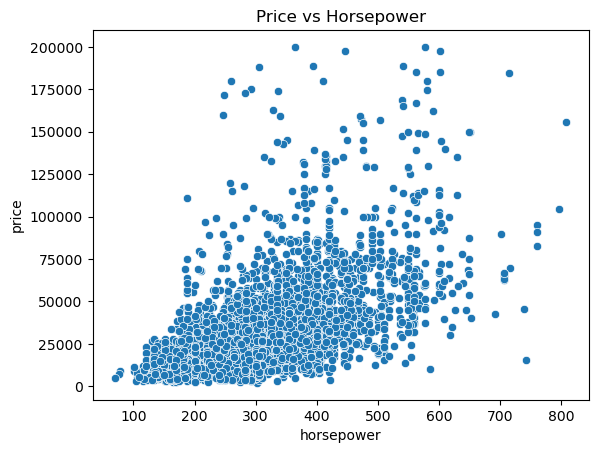

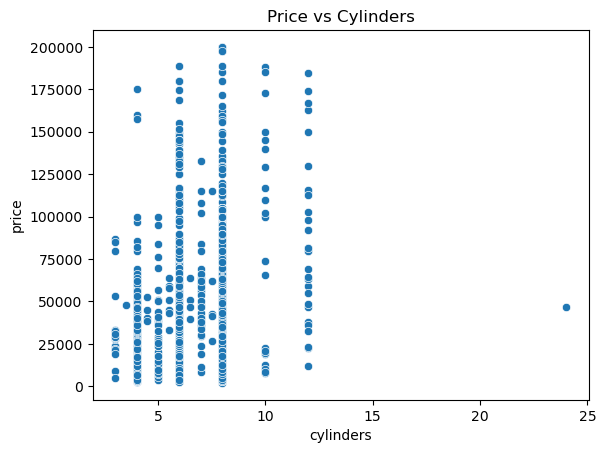

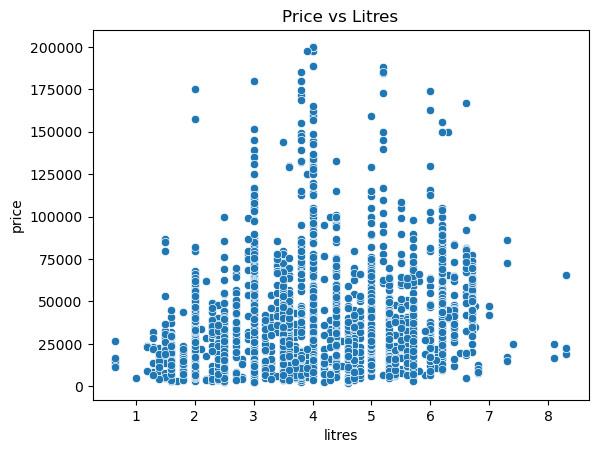

In [117]:
# Your code here
df['average_model_price'] = df.groupby('model')['price'].transform('mean')

# Scatter plot for 'horsepower' vs 'price'
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title('Price vs Horsepower')
plt.show()

# Scatter plot for 'cylinders' vs 'price'
sns.scatterplot(x='cylinders', y='price', data=df)
plt.title('Price vs Cylinders')
plt.show()

# Scatter plot for 'litres' vs 'price'
sns.scatterplot(x='litres', y='price', data=df)
plt.title('Price vs Litres')
plt.show()

**Answer**

*Your answer here*

### (iii) Data transformation for regression and neural networks

Use *accident*, *model_year* and *milage* as well as your selection from the previous task as descriptive features and *price* as the target feature. Create a test and training set like before, encoding the categorical feature. For the train-test split, use again `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`. 

Normalize the training and test sets as well as the target car. Use the `StandardScaler` from *sklearn* for normalization.

*Hint:* Append the target car to the dataset during the encoding procedure.

**[2 points]**


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Your code here
descriptive_features = ['accident', 'model_year', 'milage', 'horsepower']  # Replace 'horsepower' as needed
target_feature = 'price'

# Extract features and target
X = df[descriptive_features]
y = df[target_feature]

# Preprocess the dataset
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['model_year', 'milage', 'horsepower']),  # Replace 'horsepower' as needed
        ('cat', OneHotEncoder(), ['accident'])
    ])

X = df[descriptive_features]
y = df[target_feature]
X_encoded = preprocessor.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded[:-1], y[:-1], test_size=0.05, random_state=3)

# Extract features for target car
target_car_encoded = X_encoded[-1]

# Normalize the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In the following, we will train and evaluate various models for price prediction using the *sklearn* library. To leverage the shared interface for models in the sklearn library, it is convenient to create a function for the model training and evaluation.

### (iv) Model training function

Implement the body of the function *model_training* below. The function should adhere to the following specification:

#### Input:
- **model**: A model (e.g., Linear Regression or Neural Network) of the sklearn library.
- **x_training_data**: The descriptive data to train the model.
- **y_training_data**: The corresponding values of target feature of the training data.
- **x_test_data**: The descriptive data to test the model.
- **y_test_data**: The corresponding values of target feature of the test data.
- **grid_params**: Model parameters for a grid search.

#### Output:
- **grid**: An object of the class sklearn.model_selection.GridSearchCV that was fitted against the training data. The training should follow a 5-fold cross-validation.
- **mean_abs_err**: The mean absolute error of the trained model on the passed test data.
- **rms_err**: The root-mean-square error of the trained model on the passed test data.
- **best_params**: The optimal parameter configuration, i.e. , the parameters of the best scoring model that was selected by the grid search.

**[2 points]**

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def model_training(model, x_training_data, y_training_data, x_test_data, y_test_data, grid_params):
    grid = None
    best_params = None
    mean_abs_err = None
    # # # # # # # # # #
    # Your code here  #
    # # # # # # # # # #
    grid = GridSearchCV(estimator=model, param_grid=grid_params, cv=5)
    grid.fit(x_training_data, y_training_data)

    # Extracting the best parameters
    best_params = grid.best_params_

    # Predicting on the test data using the best model
    y_pred = grid.predict(x_test_data)

    # Calculating Mean Absolute Error and Root Mean Square Error
    mean_abs_err = mean_absolute_error(y_test_data, y_pred)
    rms_err = np.sqrt(mean_squared_error(y_test_data, y_pred))
    # # # # # # # # # #
    return grid, mean_abs_err, rms_err, best_params

### (v) Linear regression

Apply your function *model_training* to train a linear regressor. Show the errors (MAE, RMSE) and predict the price of the target car. 

**[1 point]**


In [129]:
from sklearn.linear_model import LinearRegression
# Your code here
model = LinearRegression()
grid_params = {'fit_intercept': [True, False]}

# Train the model
grid, mean_abs_err, rms_err, best_params = model_training(model, X_train, y_train_scaled, X_test, y_test_scaled, grid_params)

# Display the errors
print("Mean Absolute Error:", mean_abs_err)
print("Root Mean Square Error:", rms_err)
print("Best Parameters:", best_params)

# Preprocess the target car's features (assuming target_car_features is defined)

# Predict the price of the target car
target_car_encoded_reshaped = target_car_encoded.reshape(1, -1)
predicted_price = grid.predict(target_car_encoded_reshaped)

print("Predicted Price of Target Car:", predicted_price)



Mean Absolute Error: 0.48353902150056477
Root Mean Square Error: 0.7277252558812197
Best Parameters: {'fit_intercept': True}
Predicted Price of Target Car: [[-0.03896889]]


Learning linear relationships only provides limited performance. Therefore, we will analyze non-linear relationships.

### (vi) Regression with non-linear kernels

Plot the _milage_ feature (x-Axis) in the data against the _price_ feature (y-Axis). 

Based on the curve, what kernel functions could be used to transform the milage feature? Suggest at least two possible kernel functions. 


**[2 points]**

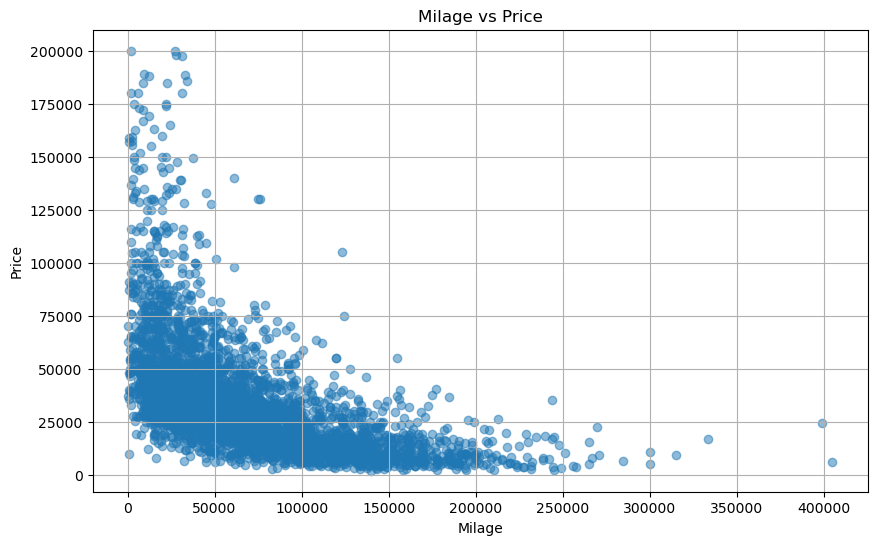

In [130]:
# Your code here
plt.figure(figsize=(10, 6))
plt.scatter(df['milage'], df['price'], alpha=0.5)
plt.xlabel('Milage')
plt.ylabel('Price')
plt.title('Milage vs Price')
plt.grid(True)
plt.show()

**Answer:**

Polynomial Kernel: It could capture the curvilinear relationship between mileage and price. A polynomial kernel of a higher degree might model the initial steep decline and the plateau effect. For instance, a quadratic (degree 2) or cubic (degree 3) polynomial could be tried.

Radial Basis Function (RBF) Kernel: It is useful for capturing more complex, localized effects. RBF kernels can handle the case where the effect of mileage on price diminishes as mileage increases, which seems to be indicated by the plot.e.

For each kernel function, create a copies of your normalized train sets, test sets and the normalized target car, and extend them with the transformed *milage* feature. Call the _model_training_ function with a linear regression model. Show the errors (MAE, RMSE) and predict the price of the target car. Which of the kernels performs best?

**[3 points]**

In [131]:
# Your code here
X_train_poly = np.copy(X_train)
X_test_poly = np.copy(X_test)
target_car_poly = np.copy(target_car_encoded)

X_train_poly[:, 1] = X_train[:, 1] ** 2
X_test_poly[:, 1] = X_test[:, 1] ** 2
target_car_poly[1] = target_car_encoded[1] ** 2

# RBF transformation using gamma parameter (example value)
gamma = 0.1
X_train_rbf = np.copy(X_train)
X_test_rbf = np.copy(X_test)
target_car_rbf = np.copy(target_car_encoded)

X_train_rbf[:, 1] = np.exp(-gamma * (X_train[:, 1] ** 2))
X_test_rbf[:, 1] = np.exp(-gamma * (X_test[:, 1] ** 2))
target_car_rbf[1] = np.exp(-gamma * (target_car_encoded[1] ** 2))

# Train models and calculate errors for each transformation
model = LinearRegression()

# Polynomial
grid_poly, mae_poly, rmse_poly, best_params_poly = model_training(model, X_train_poly, y_train, X_test_poly, y_test, {})
predicted_price_poly = grid_poly.predict(target_car_poly.reshape(1, -1))

# RBF
grid_rbf, mae_rbf, rmse_rbf, best_params_rbf = model_training(model, X_train_rbf, y_train, X_test_rbf, y_test, {})
predicted_price_rbf = grid_rbf.predict(target_car_rbf.reshape(1, -1))

# Output errors and predicted prices
print("Polynomial MAE:", mae_poly, "RMSE:", rmse_poly, "Predicted Price:", predicted_price_poly[0])
print("RBF MAE:", mae_rbf, "RMSE:", rmse_rbf, "Predicted Price:", predicted_price_rbf[0])

# Compare which kernel performed best based on MAE and RMSE
best_kernel = 'Polynomial' if mae_poly < mae_rbf else 'RBF'
print("Best Kernel:", best_kernel)

Polynomial MAE: 13916.042561373679 RMSE: 21048.193957001688 Predicted Price: 29931.914522036634
RBF MAE: 13914.183108819314 RMSE: 21022.142209333175 Predicted Price: 29690.815149153023
Best Kernel: RBF


**Answer:**

*Your answer here*

### (vii) Neural networks

While you are working on your predictive models, N. walks by. With a critical look on your screen, N. says: "Linear regression is so boring. Nowadays, deep learning is all the rage. Ever heard of ChatGPT and transformer models? Come on, at least you should train a neural network. Watch me, I'll show you," N. says, grabs your keyboard and starts typing.

In [136]:
### Provided Code (do not change!)
from sklearn.neural_network import MLPRegressor

param_grid_nn = {'activation': ['identity'],
              "early_stopping": [True],
              "validation_fraction": [0.1],
              "learning_rate": ["adaptive"],
              'solver' : ['lbfgs'],
              'hidden_layer_sizes': [(2,1), (5,1), (20,1), (100,5)]
             }
grid_nn, mean_abs_err_nn, rms_err_nn, best_params_nn = model_training(
    MLPRegressor(max_iter = 10000), X_train, y_train, X_test, y_test, param_grid_nn
)
print("Mean absolute error: {}".format(mean_abs_err_nn))
print("Root-mean-square error: {}".format(rms_err_nn))
print("Predicted Price of the target car: {}".format(grid_nn.predict(target_car_encoded_reshaped)))
print("Params of best model: {}".format(best_params_nn))

Mean absolute error: 13357.233594881258
Root-mean-square error: 20102.638793896505
Predicted Price of the target car: [33976.98490769]
Params of best model: {'activation': 'identity', 'early_stopping': True, 'hidden_layer_sizes': (20, 1), 'learning_rate': 'adaptive', 'solver': 'lbfgs', 'validation_fraction': 0.1}


Execute the code above and interpret the result in comparison to your previous results. In particular, discuss the choice of the activation function and the size of the hidden layers.

*Hint:* Set the verbose parameter of the grid search (e.g. , to 3) to get more detailed information on the model training.

**[4 points]**

**Answer:**

*Your answer here*

## (e) Discussion **[6 points]**

Summarize your findings and discuss limitations of the different prediction approaches. In your discussion, not only refer to the predicted price of the running example and the confidence of your prediction, but also to the methods in general.

- Based on the general methodologies, which approach would you prefer and why?
- Which approach performed best on the given example?
- Are your results consistent with this view?
- How would you explain the margin of errors in each approach?
- What can you deduce from the differences between MAE and RMSE?
- Are there limitations regarding the comparability of the approaches?

  
**[6 points]**

**Answer:**

*Your answer here*

Having completed your extensive work on predicting prices, you give W. a call to report your findings. W. is excited to hear about your results, and promises to consider your suggestions. 


# Q4: Predicting time-to-sale **[16 points]**

**ReDrive** has just rented a small area parking area in front of the facility with unused space for ten cars. Your new project is an exhibition of selected cars on that space. For a one-time commission, sellers can drive up their car there and your company will market the car also locally.

To maximize turnover by commissions, your business strategy is to exhibit cars there that are likely to be resold quickly. You decide that the cars on display should have an expected selling time of at most 30 days.

## (a) Data preparation **[4 points]**

In this task, we use the dataset **used_cars_reselling_states.csv**. This is an extension of the working dataframe used so far, also describing when a car has been registered for reselling (*registration_date*), when it was successfully resold (*reselling_date*), and the number of days from registration to reselling (*reselling_time*).

Run the code below. The code loads the dataframe, filters out instances without a well-defined outcome for our classification problem, and applies oversampling to the dataframe to circumvent a class imbalance problem.

In [ ]:
### Provided Code (do not change!)
import pandas as pd
df = pd.read_csv("used_cars_reselling_states.csv")
df.dropna(subset=["reselling_date"], inplace=True)

# Oversample to circumvent class imbalance 
df_fast = df[df['reselling_time'] <= 30]
df_notfast = df[df['reselling_time'] > 30]
sample_size = len(df_notfast) - len(df_fast)
random_sample = df_fast.sample(n=sample_size, replace=True)
df = pd.concat([df, random_sample], ignore_index=True)

### (i) Target feature creation

Use the column *reselling_time* to define a binary categorical (boolean) feature according to the description above and append this feature to the dataframe. 

**[1 point]**

In [ ]:
# Your code here

### (ii) Sensitivity and Specificity

You have learned about various quality metrics for classifiers.

Briefly illustrate the terms *sensitivity* and *specificity* in the context of the classification problem of fast reselling cars. Suggest which of these metrics is more important for the classifier and provide a justified reason for your suggestion. 

**[2 points]**

**Answer:**

*Your answer here*


### (iii) Data transformation for classification problem

Use *milage*, *model_year* and *price* as descriptive features and your binary feature as the target feature. Create a test and training set like before. For the train-test split, use again `train_test_split` from *sklearn* with arguments `random_state=3` and `test_size=0.05`. 

Normalize the training and test sets. Use the `StandardScaler` from *sklearn* for normalization.

**[1 point]**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## Your code here

## (b) Classifiers **[10 points]**

### (i) Model training

Train two classifiers: 
- A Logistic Regressor,
- A Support Vector Machine.

 **[1 point]**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# Your code here

### (ii) Evaluation, Part 1

For both classifiers, show the confusion matrix. 

**[2 points]**

In [ ]:
# Your code here

Compute, if possible, precision, fitness and F1-score of each classifier. Also, compute sensitivity and specificity of each classifier.

**[2 points]**

In [ ]:
# Your code here

Would you choose any of the trained classifiers for application on the described problem? If yes, which one? Justify your answer.

**[1 point]**

**Answer:**

*Your answer here*

### (iii) Evaluation, Part 2

Besides the *predict* method to decide for the class label of an instance, a `LogisticRegression` model from *sklearn* offers the method `predict_proba`. This method takes a list of instances to be classified and returns a list of tuples. Each tuple has two entries: The first entry is the probability for the respective instance to be classified as negative and the second entry is the probability for the instance to be classified as positive. Thus, the entries of each tuple sum up to 1.

As you learned in the lecture, we can vary the outcome of a logistic regression classifer by setting a threshold. Instances are labeled as positive if their probability for a positive label is greater than or equal to the threshold.

Define the body of the function *threshold_to_rates* below. This function receives a threshold between 0 and 1, and then classifies the test data based on the threshold and the outcome of the instances under the `predict_proba` method of your trained classifier. The function must return a tuple where the first entry is the true positive rate and the second entry is the false positive rate with respect to the given configuration.

**Input**:
- **h**: A real number within the interval $[0,1]$.

**Output**:
- **TPR**: The true positive rate of your test data set, based on the given threshold.
- **FPR**: The false positive rate of your test data set, based on the given threshold. 

**[3 points]**

In [ ]:
def threshold_to_rates(h):
    tpr = 0
    fpr = 0
    # # # # # # # # # #
    # Your code here  #
    # # # # # # # # # #
    
    # # # # # # # # # #
    return (tpr, fpr)

Having specified the *threshold_to_rates* function, execute the code box below to plot the ROC curve of your classifier.

In [ ]:
# Given code (Do not change)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
steps =  np.arange(1.0, -0.1, -0.1)
steps = [round(h*10)/10 for h in steps]
data = {
    h : threshold_to_rates(h)
    for h in steps
}

fpr = [data[h][1] for h in steps]
tpr = [data[h][0] for h in steps]

roc_auc = metrics.auc(fpr, tpr)
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='Your Logistic Regressor')
roc_display.plot()

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Baseline')
plt.scatter(fpr, tpr, color='red', marker='o', label='threshold h')
for i, label in enumerate(steps):
    plt.text(fpr[i], tpr[i], label, fontsize=12, ha='center', va='bottom')

plt.legend()
plt.show()

Interpret the plot. Is there a threshold you would choose for the application of the classifier on the described problem? Justify your answer.

**[1 point]**

**Answer:**

*Your answer here*

## (c) Discussion **[2 points]**

Summarize your findings. Discuss limitations and improvement potentials. 

**[2 points]**

**Answer:**

*Your answer here*